In [ ]:
#YOLOv5s Multi SGD balanced train 5

In [1]:
!nvidia-smi

Sat Jan 25 01:56:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      On  |   00000000:98:00.0 Off |                    0 |
| N/A   59C    P0             30W /   72W |    1021MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import os  
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import os
!pip install ultralytics
import ultralytics
from IPython import display

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
model = YOLO('yolov5n.yaml')

In [7]:
save_directory = '/home/user35/yolo/YOLODataset_ava'

# Create the directory if it does not exist
os.makedirs(save_directory, exist_ok=True)

In [2]:
#Dropout layers added with p=0.05

import torch
import torch.nn as nn
from ultralytics import YOLO

# Function to add dropout to convolutional layers
def add_dropout_to_model(model, dropout_rate=0.05):
    """
    Adds dropout after convolutional layers in the YOLO model.
    """
    for name, module in model.model.named_children():
        if isinstance(module, nn.Sequential):
            for idx, layer in enumerate(module):
                if isinstance(layer, nn.Conv2d):
                    # Wrap Conv2d layer with Dropout
                    conv_with_dropout = nn.Sequential(
                        layer,
                        nn.Dropout(p=dropout_rate)
                    )
                    module[idx] = conv_with_dropout
    print(f"✅ Dropout layers added with p={dropout_rate}")
    return model

# Load the modified YOLO model
checkpoint = torch.load('yolov5s_reduced.pt', map_location='cpu')
model = YOLO('/home/user35/yolo/yolo5/new/runs/detect/train66/weights/last.pt')  # Load the original YOLO model
model.model = checkpoint['model']  # Assign the modified model
print("✅ Modified model loaded successfully!")

# 📌 Print model structure before modification
print("🔍 Model Structure Before Modification:")
print(model.model.model)

# 🚀 Step 1: Remove Unnecessary Layers
model.model.model = model.model.model[:-1]  # Removes the last layer
if len(model.model.model) > 1:
    model.model.model.pop(1)  # Removes the second layer (modify as needed)

# 📌 Print updated structure
print("\n🔍 Model Structure After Layer Removal:")
print(model.model.model)

# ✅ Step 2: Unfreeze Layers for Training
for name, param in model.model.named_parameters():
    param.requires_grad = True  # Unfreeze all layers (modify as needed)

# ✅ Step 3: Add Dropout Layers
model = add_dropout_to_model(model, dropout_rate=0.4)

# ✅ Step 4: Save the Modified Model (Correct Method)
torch.save({'model': model.model}, 'yolov5s_reduced.pt')
print("✅ Modified model saved successfully!")

# ✅ Step 5: Reload the Model Properly
checkpoint = torch.load('yolov5s_reduced.pt', map_location='cpu')
model.model = checkpoint['model']  # Restore full model
print("✅ Model loaded successfully!")

# ✅ Step 6: Train the Model with Custom Hyperparameters
save_directory = '/home/user35/yolo/YOLOOutputs/'

results = model.train(
    data='/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml',  # Dataset configuration
    epochs=300,       # Number of training epochs
    batch=16,         # Batch size
    imgsz=1024,       # Input image size
    lr0=0.001,        # Initial learning rate
    momentum=0.907,   # Momentum for optimizer
    weight_decay=0.0005,  # Regularization factor
    patience=20,      # Early stopping patience
    save_period=5,    # Save model every 5 epochs
    optimizer='SGD',  # Use Stochastic Gradient Descent
    save_dir=save_directory,  # Directory to save outputs
    workers=8,        # Number of workers for data loading
    cache='ram',      # Load dataset into RAM for faster access
    device=0,         # Use GPU (device 0)
    resume= True,
    augment=True,     # Enable data augmentation
)

print(f"✅ Training complete. Model saved in: {save_directory}")


✅ Modified model loaded successfully!
🔍 Model Structure Before Modification:
Sequential(
  (0): Conv(
    (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): SPPF(
    (cv1): Conv(
      (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(512, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
  )
  (2): Conv(
    (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(256, eps=0.001, m

train: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/train/labels.cache... 1911 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.6GB RAM): 100%|██████████| 1911/1911 [00:02<00:00, 637.62it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100%|██████████| 818/8


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.4GB RAM): 100%|██████████| 818/818 [00:01<00:00, 637.95it/s]


Plotting labels to runs/detect/train66/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.907) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Resuming training /home/user35/yolo/yolo5/new/runs/detect/train66/weights/last.pt from epoch 139 to 300 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train66
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      9.77G       1.06     0.9536      1.236        142       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.466      0.198      0.202      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      11.6G      1.049     0.9452      1.237        167       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.465      0.201      0.206      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      10.9G      1.058     0.9566      1.241        156       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.91it/s]


                   all        818      11006      0.493      0.202      0.208      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      9.93G      1.048     0.9494      1.233        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        818      11006      0.472      0.205      0.209      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300       9.8G      1.035     0.9382      1.231        194       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        818      11006        0.5      0.193      0.208       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      11.1G      1.058     0.9512      1.245        142       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.68it/s]


                   all        818      11006      0.505      0.194      0.208      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      9.93G       1.07     0.9624      1.246        146       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.521      0.197      0.211      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      10.8G      1.045     0.9415      1.234        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        818      11006      0.475      0.197      0.209       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300        10G      1.058     0.9529      1.244        213       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]


                   all        818      11006      0.482      0.206      0.211      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      10.1G       1.06     0.9552      1.244         92       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]

                   all        818      11006      0.471      0.205      0.212      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      9.95G      1.023      0.926      1.228        110       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        818      11006      0.486        0.2      0.212      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      10.1G      1.033     0.9341      1.231        135       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]

                   all        818      11006      0.484      0.199      0.213      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      11.2G       1.03     0.9317      1.229        178       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        818      11006      0.514      0.196      0.214      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      10.3G      1.025     0.9201      1.222        123       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        818      11006      0.493      0.207      0.216      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      10.4G      1.034     0.9336      1.231        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.497      0.198      0.214      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      9.68G      1.027     0.9228      1.223        204       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]

                   all        818      11006      0.471      0.206      0.215      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      11.2G      1.019     0.9165       1.22        215       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006       0.49      0.198      0.215      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      10.3G      1.028     0.9206      1.225        131       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.447      0.204      0.216      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      10.5G      1.022     0.9246      1.224        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.497      0.207      0.218      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      10.2G      1.033     0.9346      1.233         96       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.492      0.205      0.217      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      11.4G      1.021     0.9144      1.219        135       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]

                   all        818      11006       0.51      0.204      0.219      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300        10G      1.016     0.9109      1.214        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]

                   all        818      11006      0.497      0.208      0.221      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300        10G      1.023     0.9243      1.224        138       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006       0.47      0.205      0.218      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      10.8G      1.019     0.9142      1.218        134       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006      0.493      0.207       0.22      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      11.1G      1.017     0.9081      1.214        168       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]


                   all        818      11006      0.492      0.202       0.22      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      9.78G     0.9982     0.8988      1.202         97       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.445      0.217      0.221      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      9.73G      1.015      0.911      1.218         82       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]

                   all        818      11006      0.479       0.21      0.223      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      10.5G      1.015     0.9194      1.219        161       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all        818      11006      0.534      0.206      0.224      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      10.6G      1.004     0.8976      1.205        188       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.506      0.208      0.224      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300       9.8G      1.005     0.9051      1.215        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.519      0.209      0.225      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      10.5G      1.013     0.9048       1.21        211       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.479      0.213      0.223      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300        10G     0.9965     0.8879      1.204        143       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006      0.517      0.213      0.227       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      10.3G     0.9997     0.8978      1.201        182       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.487      0.211      0.222      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300        10G      0.997     0.8942      1.205        147       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]

                   all        818      11006      0.507      0.211      0.225       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      10.5G     0.9812     0.8812      1.197        165       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]

                   all        818      11006      0.474      0.216      0.226       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      9.57G      1.002     0.9029       1.21        128       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]

                   all        818      11006      0.468      0.216      0.225       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      10.5G     0.9953     0.8845      1.205        194       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.502      0.213      0.229      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      10.4G      0.985     0.8834      1.196        137       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.482      0.215      0.227      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      10.5G     0.9954     0.8943      1.203        128       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.501      0.214      0.231      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      10.9G      0.992     0.8856        1.2        115       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.492      0.214      0.231      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      10.7G     0.9968     0.8953      1.205        174       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.468      0.218      0.228      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      10.4G     0.9768     0.8769      1.199        160       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.485      0.222      0.232      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300        10G     0.9899     0.8859      1.199        102       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006       0.48       0.22      0.232      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      10.1G     0.9889      0.886      1.201        151       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        818      11006      0.482      0.224      0.235      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      10.5G     0.9754     0.8797      1.196        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.514      0.216      0.233      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      10.4G     0.9956     0.8993      1.212         79       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.466      0.225      0.233      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      10.7G     0.9847     0.8793        1.2        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006       0.48      0.221      0.233      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      10.4G     0.9771     0.8814      1.197         61       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.507      0.219      0.236      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      10.4G     0.9702     0.8657       1.19        174       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.504      0.227      0.237      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      9.92G      0.975     0.8721      1.191        127       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.492      0.225      0.238      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      10.5G     0.9731     0.8681      1.194        148       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.91it/s]

                   all        818      11006        0.5      0.227      0.239      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      10.1G     0.9768     0.8712      1.188        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.479      0.227      0.238      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300        10G     0.9654      0.861      1.182        167       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all        818      11006      0.526      0.223      0.239      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      10.8G     0.9872      0.877      1.194        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.90it/s]

                   all        818      11006        0.5      0.225      0.241      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      10.4G     0.9687     0.8689      1.189        108       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]


                   all        818      11006      0.499      0.224      0.241      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      12.3G     0.9704      0.867      1.185        224       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        818      11006      0.494      0.225      0.241      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      10.5G     0.9594     0.8528      1.178        146       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        818      11006      0.466      0.232      0.239      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      9.99G     0.9708      0.868      1.192        174       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]


                   all        818      11006      0.494       0.23      0.242       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      10.4G     0.9702     0.8683      1.189        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]

                   all        818      11006      0.469      0.232      0.242       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      10.1G     0.9418     0.8407      1.173        185       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.499      0.226      0.242      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      10.1G     0.9542     0.8566      1.185        150       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all        818      11006      0.497      0.229      0.243      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      10.1G     0.9689     0.8658      1.188        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006      0.457      0.242      0.243      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      9.72G     0.9487     0.8463      1.174        199       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.475      0.238      0.244      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      11.3G     0.9548     0.8505      1.178        173       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all        818      11006      0.495       0.23      0.244      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      10.5G       0.95      0.848      1.176        158       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.503      0.229      0.244      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      9.61G     0.9657     0.8665      1.189        178       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]

                   all        818      11006      0.464      0.237      0.244      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      10.4G     0.9442     0.8451      1.176        160       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  2.00it/s]

                   all        818      11006      0.502       0.23      0.246      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      10.6G     0.9433     0.8441      1.175        161       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        818      11006      0.482      0.236      0.245      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      10.5G     0.9484     0.8428      1.174        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.91it/s]

                   all        818      11006      0.503      0.231      0.246      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      10.1G      0.952     0.8557      1.184        128       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.90it/s]

                   all        818      11006      0.516      0.232      0.246      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      10.2G       0.95     0.8494      1.174         90       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]

                   all        818      11006      0.489      0.234      0.247      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      10.1G     0.9451      0.846      1.178        113       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]

                   all        818      11006      0.493      0.235      0.247      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      10.1G     0.9447     0.8453      1.176        207       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all        818      11006      0.478      0.241      0.247      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      10.1G     0.9345     0.8378       1.17        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.488      0.239      0.248      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300        10G     0.9407     0.8363       1.17        218       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.90it/s]

                   all        818      11006      0.485      0.241      0.248      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      9.82G     0.9444     0.8431      1.173        200       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.465      0.247       0.25      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      10.6G     0.9436     0.8416      1.174         94       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        818      11006      0.474      0.244       0.25      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      10.2G     0.9581     0.8534      1.182        142       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]

                   all        818      11006      0.464      0.244       0.25      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      9.89G     0.9512     0.8551      1.183        125       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.486      0.244      0.251      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      11.6G     0.9408     0.8409      1.178        108       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006       0.47      0.249      0.253      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      10.1G     0.9396     0.8429      1.177        121       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006      0.473      0.249      0.254      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      10.5G     0.9367     0.8354      1.167        175       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]

                   all        818      11006      0.489      0.243      0.253      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      10.1G     0.9237      0.822      1.164         77       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]

                   all        818      11006      0.475      0.247      0.254      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      10.1G     0.9325     0.8264      1.165        127       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        818      11006      0.467      0.248      0.254      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      10.3G     0.9319     0.8372      1.171        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006      0.465       0.25      0.254      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      10.1G     0.9373     0.8405      1.177        180       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


                   all        818      11006      0.454      0.251      0.252      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      10.4G     0.9256     0.8255      1.163        210       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]

                   all        818      11006      0.475      0.246      0.253      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      10.6G     0.9378     0.8321      1.163        166       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]

                   all        818      11006      0.478       0.25      0.254      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      10.4G     0.9378     0.8387      1.174        212       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.92it/s]

                   all        818      11006      0.474      0.249      0.255      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      10.6G     0.9235     0.8217       1.16        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.491      0.246      0.255      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      10.5G     0.9234     0.8277      1.166        156       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.94it/s]

                   all        818      11006      0.481      0.249      0.255      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      10.7G     0.9311     0.8301      1.165        125       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.486      0.248      0.255      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      9.73G     0.9327      0.832      1.164        151       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]


                   all        818      11006      0.477      0.245      0.255      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      10.2G     0.9309     0.8339      1.166        179       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.98it/s]

                   all        818      11006       0.49      0.248      0.258      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      10.7G      0.921     0.8262      1.165         98       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  2.00it/s]

                   all        818      11006      0.483       0.25      0.258      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      9.87G     0.9243     0.8279      1.169        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        818      11006       0.49       0.25      0.258       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300        10G     0.9259     0.8255      1.162         97       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]

                   all        818      11006      0.478      0.251      0.257       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      10.9G     0.9162     0.8221       1.16        206       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.28it/s]


                   all        818      11006      0.474      0.253      0.258       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      9.74G     0.9244     0.8325      1.171        137       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.16it/s]


                   all        818      11006      0.487       0.25      0.258      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      10.5G     0.9206     0.8204      1.161        151       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.14it/s]


                   all        818      11006      0.488       0.25      0.258      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300       9.9G     0.9267     0.8278      1.162        109       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]


                   all        818      11006      0.493      0.251      0.259      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300        10G     0.9199     0.8179      1.157        149       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.33it/s]


                   all        818      11006      0.488      0.254      0.259      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      9.55G     0.9154     0.8152      1.158        205       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.21it/s]


                   all        818      11006      0.483      0.252      0.258      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      9.74G     0.9019     0.8083      1.152        108       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]


                   all        818      11006      0.495       0.25       0.26      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      10.2G     0.9207     0.8198      1.159        147       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.38it/s]

                   all        818      11006      0.493      0.251       0.26      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      10.1G     0.9263       0.83      1.166        121       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.38it/s]

                   all        818      11006      0.496      0.253      0.261      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300        10G     0.9245     0.8236      1.163        222       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.25it/s]


                   all        818      11006      0.505      0.249      0.261      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      10.9G     0.9133     0.8175      1.161        102       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


                   all        818      11006      0.494      0.253      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      9.92G     0.9098     0.8123      1.154        108       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.492      0.253      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      9.99G     0.9109     0.8094      1.152        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.40it/s]


                   all        818      11006      0.481      0.258      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      10.1G     0.9219     0.8303      1.167         58       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.38it/s]

                   all        818      11006      0.481      0.257      0.262      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      10.8G     0.9102     0.8101      1.155        113       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]


                   all        818      11006      0.487      0.255      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      9.55G     0.8983     0.8043       1.15        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.36it/s]


                   all        818      11006      0.494      0.256      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      10.5G     0.9202     0.8223      1.162        191       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.489      0.255      0.262      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      10.5G     0.9137     0.8142      1.159        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.475      0.259      0.262      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      10.5G     0.9156     0.8221      1.158        321       1024:  45%|████▌     | 54/120 [00:22<00:27,  2.43it/s]Exception in thread Thread-19:
Traceback (most recent call last):
  File "/opt/intel/oneapi/intelpython/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/opt/intel/oneapi/intelpython/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/home/user35/.local/lib/python3.9/site-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/home/user35/.local/lib/python3.9/site-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/opt/intel/oneapi/intelpython/lib/python3.9/multiprocessing/queues.py", line 122, in get
   

KeyboardInterrupt: 

In [9]:
#Dropout layers added with p=0.2

from ultralytics import YOLO
import torch
from torch import nn

# Define a function to add dropout layers to the model
def add_dropout(model, dropout_rate=0.2):
    """
    Dynamically add dropout layers to the model's convolutional layers.
    """
    for module in model.model.modules():
        if isinstance(module, nn.Conv2d):
            module.dropout = nn.Dropout(p=dropout_rate)
    print(f"Dropout layers added with p={dropout_rate}")

# Load a smaller model (e.g., YOLOv8n) with half precision
model = YOLO('yolov5su.pt')  # Pre-trained model loaded
# Add dropout layers to the model
add_dropout(model, dropout_rate=0.2)  # Adjust the dropout rate as needed

# Define the save directory
save_directory = '/home/user35/yolo/YOLOOutputs/'

# Train the model with custom hyperparameters
results = model.train(
    data='/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml',  # Dataset configuration file
    epochs=300,  # Number of training epochs
    batch=16,  # Batch size
    imgsz=1024,  # Image size: Higher value for accuracy, lower for speed
    lr0=0.001,  # Initial learning rate
    momentum=0.907,  # Momentum for gradient updates
    weight_decay=0.0005,  # Regularization to prevent overfitting
    patience=20,  # Early stopping if no improvement after 10 epochs
    save_period=5,  # Save the model every 5 epochs
    optimizer='SGD',  # Optimizer: Try Adam/AdamW for more flexibility
    save_dir=save_directory,  # Directory to save model and training outputs
    workers=8,  # Number of workers for data loading
    cache='ram',  # Load dataset into RAM for faster access
    device=1,  # Specify GPU device ID
    augment=True,  # Enable data augmentation for better generalization
)

print("Training complete. Model saved in:", save_directory)


Dropout layers added with p=0.2
New https://pypi.org/project/ultralytics/8.3.67 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.52 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:1 (NVIDIA L4, 22589MiB)
engine/trainer: task=detect, mode=train, model=yolov5su.pt, data=/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml, epochs=300, time=None, patience=20, batch=16, imgsz=1024, save=True, save_period=5, cache=ram, device=1, workers=8, project=None, name=train51, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=N

train: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/train/labels.cache... 1911 images, 0 backgrounds,


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.6GB RAM): 100%|██████████| 1911/1911 [00:10<00:00, 174.96it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels... 818 images, 0 backgrounds, 0 corrup


val: New cache created: /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.4GB RAM): 100%|██████████| 818/818 [00:04<00:00, 169.63it/s]


Plotting labels to runs/detect/train51/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.907) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train51
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      10.2G        2.6      4.349      2.187        138       1024: 100%|██████████| 120/120 [00:50<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006     0.0351     0.0479     0.0196    0.00923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      10.6G       2.15      3.013      1.885        174       1024: 100%|██████████| 120/120 [00:48<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.375      0.108     0.0851     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      10.8G      1.898      2.296      1.666        142       1024: 100%|██████████| 120/120 [00:49<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.431      0.167      0.137     0.0727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      10.4G      1.683       1.82      1.492        163       1024: 100%|██████████| 120/120 [00:47<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.474      0.196      0.169     0.0907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      9.81G       1.51      1.509      1.373        195       1024: 100%|██████████| 120/120 [00:48<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006       0.53      0.217      0.199       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      10.7G      1.394      1.343      1.292        152       1024: 100%|██████████| 120/120 [00:48<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.548      0.235       0.22      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      9.95G      1.307      1.204      1.233        142       1024: 100%|██████████| 120/120 [00:48<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.574      0.241      0.241      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      11.1G      1.212      1.091      1.176        149       1024: 100%|██████████| 120/120 [00:47<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.586      0.252      0.259      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300        10G      1.165      1.036      1.153        211       1024: 100%|██████████| 120/120 [00:56<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.462       0.26      0.273      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      9.94G      1.117     0.9781      1.122         95       1024: 100%|██████████| 120/120 [01:27<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.473      0.277       0.29      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      9.94G      1.053     0.9089      1.091        103       1024: 100%|██████████| 120/120 [01:29<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.471      0.278      0.298      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      9.77G      1.032     0.8868       1.08        132       1024: 100%|██████████| 120/120 [01:32<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.465      0.308      0.321      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      10.5G      1.001     0.8516      1.061        168       1024: 100%|██████████| 120/120 [01:32<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.436       0.34      0.332      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      10.4G     0.9751     0.8198      1.046        106       1024: 100%|██████████| 120/120 [01:34<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.471      0.351      0.351      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      10.5G      0.959     0.8064      1.042        171       1024: 100%|██████████| 120/120 [01:36<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.471      0.348      0.354      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300       9.7G     0.9206     0.7699       1.02        193       1024: 100%|██████████| 120/120 [01:39<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.484      0.356      0.362      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      11.1G     0.9011     0.7477      1.013        215       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.497      0.358      0.372      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      9.86G      0.897     0.7393      1.009        125       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.499      0.367      0.382      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      10.1G     0.8689     0.7206     0.9978        175       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.521      0.376      0.392      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.3G     0.8665     0.7148     0.9998         91       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.54      0.373      0.399      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      11.1G      0.848     0.6906     0.9861        115       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.555      0.377      0.409      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      9.61G     0.8299     0.6781       0.98        123       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.538      0.394       0.42      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      9.64G      0.832     0.6772     0.9822        124       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.554      0.399      0.422      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      10.8G     0.8131     0.6616     0.9724        134       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.569      0.394      0.432      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      10.7G     0.8067      0.653     0.9683        161       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.567      0.417      0.445      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      10.3G     0.7838     0.6327      0.958         95       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.6      0.408      0.454      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      9.64G     0.7809     0.6334     0.9614         77       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.604      0.421      0.466      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      10.4G     0.7814     0.6317     0.9601        158       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.563      0.424      0.458      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      10.1G     0.7767     0.6219     0.9536        194       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.569       0.44      0.472      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      9.84G     0.7591     0.6056     0.9522        117       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.582      0.437       0.48       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      10.5G     0.7658     0.6086     0.9498        206       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.592      0.452      0.492      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      10.1G     0.7404     0.5917      0.938        127       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.614      0.446      0.492      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      10.3G     0.7395     0.5906     0.9356        184       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.62      0.458      0.505      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300        11G      0.726     0.5734     0.9334        149       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.641      0.449      0.511      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      10.5G     0.7137     0.5672     0.9297        163       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.647      0.451      0.511      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      9.58G     0.7263     0.5748     0.9331        125       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.636      0.475      0.527      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      10.4G     0.7137      0.559     0.9258        191       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.676      0.465      0.531      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      10.4G     0.7054     0.5535     0.9194        149       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.679      0.469      0.538      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300        11G     0.7069     0.5566     0.9231        130       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.683      0.482      0.549      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      10.8G     0.6919     0.5425     0.9151        124       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.668      0.489      0.546      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      10.6G     0.6926     0.5431     0.9178        154       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.685      0.488      0.555      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      10.5G     0.6814     0.5311     0.9129        158       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.704      0.491      0.564      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      10.9G     0.6913     0.5366     0.9164        100       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.72      0.491       0.57      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      10.1G     0.6797      0.528     0.9119        142       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.682      0.505      0.569      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      10.6G     0.6738     0.5227     0.9112        124       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.682      0.517      0.576      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      10.1G     0.6757     0.5248     0.9104         80       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.688      0.523      0.585      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      10.7G     0.6709     0.5168     0.9068        124       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.7      0.519      0.587      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      10.1G     0.6634     0.5139     0.9051         65       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.724      0.506      0.586      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      10.5G     0.6574     0.5075     0.9026        167       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.705      0.525      0.594      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      9.96G     0.6556     0.5048     0.8988        117       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.711      0.531      0.598      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      10.1G     0.6454      0.497     0.8982        147       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.744      0.517      0.603      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      10.1G     0.6474     0.4958      0.896        113       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.712      0.541      0.606      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300        10G     0.6364     0.4899     0.8942        168       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.727      0.539      0.611      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      11.1G     0.6453     0.4962      0.898        170       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.717      0.529      0.605      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      10.4G      0.643     0.4918     0.8961        105       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.733      0.539      0.614      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      11.9G     0.6318     0.4828     0.8903        216       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.745      0.543      0.625        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      10.9G     0.6232     0.4747     0.8885        138       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.748      0.525      0.614      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      9.99G     0.6281     0.4839      0.891        184       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.744      0.548      0.626      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      10.9G     0.6357     0.4852     0.8919        111       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.753      0.549       0.63      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      10.1G     0.6141     0.4676     0.8849        194       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.754      0.557      0.635      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      10.2G     0.6147     0.4727     0.8883        146       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.758       0.55      0.634      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300        10G     0.6264     0.4797     0.8906        124       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.741      0.563      0.635      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      9.74G     0.6136      0.468     0.8854        204       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.742      0.567       0.64      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      11.4G     0.6101     0.4629     0.8828        164       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.777      0.549      0.642      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      10.1G     0.6084     0.4643     0.8828        162       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.766      0.556      0.645      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      9.62G     0.6096     0.4693     0.8855        191       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.772      0.557      0.648      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      10.2G     0.5987     0.4527     0.8813        141       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.78       0.57      0.655      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      10.6G     0.5987     0.4553     0.8813        161       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.788       0.57      0.657      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      10.5G     0.5933     0.4493     0.8774        183       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.756      0.575      0.656      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300        11G     0.5982     0.4512     0.8796        125       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.752      0.589      0.662      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      10.6G     0.5985     0.4553     0.8806         71       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.79      0.572      0.661      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      9.66G     0.5894     0.4464     0.8776        119       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.798      0.571      0.667       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      10.6G     0.5914     0.4483     0.8779        211       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.79      0.584      0.669      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      10.6G     0.5819     0.4432     0.8757        116       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.782      0.588      0.673      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      10.9G     0.5845      0.443     0.8741        224       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.796      0.577       0.67      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      9.88G     0.5841     0.4413     0.8756        193       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.787      0.591      0.674      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      10.4G      0.582     0.4389     0.8745        104       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.8      0.587      0.676      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      11.1G     0.5814     0.4395     0.8743        143       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.803      0.582      0.673      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      10.4G     0.5797     0.4417     0.8759        110       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.804      0.599      0.689      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      11.1G     0.5746     0.4337     0.8732        103       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.81      0.595      0.688      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      10.1G     0.5745     0.4336     0.8734        122       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.808      0.599      0.694      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      10.5G     0.5749     0.4338     0.8725        186       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.806      0.603      0.694      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      10.1G      0.561      0.424     0.8688         80       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.794      0.612       0.69      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      10.1G     0.5579       0.42     0.8656        132       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.807      0.608      0.694      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      10.3G     0.5644     0.4244     0.8684        121       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.8       0.62        0.7      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300        10G     0.5677      0.425     0.8719        189       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.825      0.605      0.702      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      9.99G     0.5604     0.4204      0.866        196       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.828      0.609      0.706      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      10.5G     0.5705     0.4272     0.8676        153       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.809      0.611      0.704      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      10.5G     0.5648     0.4283     0.8696        201       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.819      0.616      0.709       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      10.6G     0.5553     0.4193     0.8636        146       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.807      0.623      0.709       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      10.5G     0.5532     0.4166     0.8665        164       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.811      0.618      0.708      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      10.7G     0.5556      0.415     0.8665        134       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.811      0.631      0.715      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      9.81G     0.5587     0.4191     0.8666        153       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.825      0.622      0.713      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      10.1G     0.5503     0.4124     0.8642        172       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.824       0.63      0.718      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      10.2G     0.5489     0.4137     0.8647         97       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.82      0.633      0.721       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      9.68G     0.5483     0.4113     0.8637        183       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.832      0.625      0.717      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      10.5G      0.547     0.4104     0.8623         92       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.819      0.635      0.721      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300        11G      0.546     0.4089     0.8613        211       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.838      0.629      0.726      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      9.74G     0.5492     0.4107     0.8655        134       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.839      0.629      0.723      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      10.5G     0.5426     0.4059     0.8614        144       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.835      0.631      0.724      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      10.3G     0.5466     0.4106     0.8615         98       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.831       0.64      0.729      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300        10G     0.5377     0.4004     0.8586        152       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.837      0.634      0.729      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      9.58G      0.536     0.4017     0.8596        216       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.841      0.638      0.734      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      9.74G     0.5256      0.396      0.857        106       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.838      0.639      0.732      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      10.1G     0.5362     0.4028      0.858        160       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.833      0.644      0.735      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      10.6G      0.543     0.4054     0.8615        135       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.84      0.646      0.736      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      10.1G     0.5402     0.4004     0.8581        205       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.839      0.641      0.736      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      10.5G     0.5315     0.3977     0.8601        104       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.815      0.649      0.733      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      9.99G     0.5291     0.3961      0.856        104       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.826      0.649      0.737      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      10.1G     0.5313     0.3971     0.8554        168       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.834      0.655      0.739      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      10.6G     0.5324     0.3991     0.8594         48       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.844       0.65      0.741      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      10.8G     0.5282     0.3937     0.8569        112       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.842      0.661      0.746       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300       9.6G     0.5206     0.3902     0.8543        143       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.838      0.657      0.742      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      10.6G      0.524     0.3923     0.8569        187       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.856      0.654      0.748      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      10.5G      0.525     0.3911     0.8556        173       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.834      0.662      0.744      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      10.5G      0.527     0.3926     0.8579        145       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.827      0.665      0.745       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      10.1G     0.5234      0.388      0.855        272       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.85      0.661      0.751      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      9.53G     0.5244     0.3915     0.8568        187       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.85      0.649      0.747      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      10.7G     0.5197     0.3883     0.8559        130       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.838       0.66      0.747      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      10.4G     0.5209     0.3876     0.8569        129       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.834      0.664      0.751      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      10.2G     0.5134     0.3822     0.8521        150       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.837       0.67      0.755      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300        10G     0.5065     0.3789     0.8514        119       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.838      0.665      0.751      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300        10G     0.5134     0.3823     0.8536        145       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.834      0.667      0.751      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      10.6G     0.5107     0.3814     0.8536        171       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.855      0.659      0.752      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      10.5G     0.5191     0.3842     0.8533        144       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.846      0.673      0.758      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300        11G     0.5186      0.387     0.8541        224       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.853      0.676      0.761      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      10.5G     0.5141     0.3814     0.8519        161       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.856      0.667      0.758      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      9.89G     0.5153     0.3831     0.8528        217       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.862      0.674      0.761       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      10.4G     0.5139     0.3811     0.8535        127       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.842      0.678      0.762       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      9.72G     0.5042     0.3748     0.8499        122       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.847      0.676      0.764      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      10.1G     0.5008     0.3734     0.8492        171       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.853      0.675      0.763      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      10.6G     0.5066     0.3766     0.8509         97       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.859      0.673      0.763      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      10.5G     0.5064     0.3762     0.8496        176       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.857      0.677      0.766      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      10.1G     0.5091     0.3769     0.8524        146       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.864      0.674      0.769      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      10.4G     0.5078     0.3767     0.8515        189       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.855      0.679       0.77      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      10.2G     0.5092     0.3779     0.8497        193       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.87      0.671      0.769      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      11.9G     0.4996     0.3679     0.8479        116       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.871      0.676       0.77       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      10.9G     0.4972      0.369     0.8497        176       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.856      0.689      0.776      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      10.5G     0.5026     0.3685     0.8482        133       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.869      0.681      0.775      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      9.74G     0.4972     0.3714     0.8478        125       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.873      0.679      0.776      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      9.87G     0.4888     0.3648     0.8457         98       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.861      0.684      0.776      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      10.6G      0.497     0.3695     0.8475        131       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.873      0.685      0.777      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      9.55G     0.4943     0.3686     0.8472        162       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.862      0.684      0.775      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      10.2G     0.5018     0.3708     0.8468        160       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.867      0.687      0.779      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      10.2G     0.4931     0.3653     0.8466        198       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.87      0.686      0.776      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      11.5G     0.4862     0.3609     0.8441        120       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.857      0.692      0.778      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      10.4G     0.4975     0.3676     0.8477        118       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.866      0.692      0.781      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      9.72G     0.4942     0.3655      0.846        171       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.877      0.684      0.781      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      9.75G     0.4902     0.3638     0.8458        182       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.858      0.695      0.778       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      9.95G      0.495     0.3675     0.8485        126       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.875      0.686      0.779      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      10.8G     0.4928      0.364     0.8468        126       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.868      0.689      0.779      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300        11G     0.4877     0.3612     0.8444        142       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.874      0.691      0.783      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      10.5G     0.4819     0.3581     0.8424        122       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.887      0.688      0.784      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      10.3G     0.4938     0.3622     0.8453        198       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.881      0.687      0.782      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      10.1G     0.4904     0.3653     0.8472        222       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.878      0.696      0.784      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      10.4G     0.4885     0.3627      0.845        156       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.874      0.698      0.787      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      10.5G     0.4804     0.3565     0.8428        175       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.884      0.689      0.787      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      10.8G     0.4875     0.3633     0.8487        145       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.882      0.696       0.79      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300        11G     0.4802     0.3539      0.844        162       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.882      0.697      0.788       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      10.1G     0.4842     0.3571     0.8435        167       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.889        0.7      0.791      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      10.7G     0.4776     0.3548     0.8422        186       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.879      0.701       0.79      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      10.4G     0.4809     0.3555     0.8432        217       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.889      0.696       0.79      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      10.7G     0.4757     0.3546     0.8427        161       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.882      0.696       0.79      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      9.82G      0.482     0.3568      0.844        140       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.881        0.7       0.79      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      10.5G     0.4827     0.3584     0.8443        136       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.884      0.702      0.791      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      10.2G     0.4739      0.354     0.8433        189       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.876      0.708      0.794      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300        10G     0.4785     0.3567     0.8433        177       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.886      0.704      0.794      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      10.5G     0.4705     0.3489     0.8398        136       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.88      0.714      0.797      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      10.5G     0.4764     0.3526     0.8423        171       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.888       0.71      0.797      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300        10G      0.476     0.3524     0.8414        140       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.887       0.71      0.799      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      9.59G     0.4638     0.3425     0.8384        200       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.882      0.713      0.799      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      10.9G     0.4705     0.3489     0.8403        102       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.885      0.706      0.796       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      9.74G     0.4717     0.3482     0.8388        165       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.881      0.707      0.797      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      10.3G     0.4733     0.3519     0.8412        162       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.886      0.709      0.797      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      10.6G     0.4756      0.353     0.8431        157       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.892      0.708        0.8      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      10.2G     0.4745     0.3523     0.8425         69       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.894      0.705      0.799      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      10.1G     0.4767     0.3518     0.8412        142       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.885      0.713        0.8      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      9.94G     0.4735     0.3517     0.8413        195       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.888      0.714      0.802      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      10.4G     0.4693     0.3466     0.8405        189       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.886      0.715      0.802      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      10.6G     0.4579     0.3407     0.8365        163       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.886      0.715      0.802      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      9.76G     0.4719     0.3495      0.841        195       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.882      0.714      0.799      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      10.5G     0.4651     0.3437     0.8397        136       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.884      0.717      0.801      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      11.7G     0.4709     0.3454     0.8396        111       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.891      0.718      0.804      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      9.97G     0.4686     0.3478     0.8399        118       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.877      0.725      0.804      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      10.1G     0.4687     0.3451     0.8384        192       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.881      0.725      0.805      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      10.1G     0.4638     0.3451     0.8379        114       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.892      0.718      0.806      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      10.1G     0.4546     0.3374     0.8348        136       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.885       0.72      0.805      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300        11G     0.4603     0.3428      0.837        200       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.895      0.718      0.807      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      10.3G     0.4624     0.3433     0.8384         89       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.883      0.727      0.807      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      9.68G     0.4559     0.3391     0.8385        162       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.891      0.722      0.806      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      10.3G     0.4674     0.3456     0.8391        177       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.893      0.722      0.809      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      9.56G     0.4637     0.3429     0.8386        127       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.897       0.72      0.809      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300       9.8G     0.4562     0.3393     0.8372         86       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.895       0.72      0.809      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      10.9G     0.4551     0.3361     0.8358        169       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.891      0.721      0.808      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      9.99G     0.4605      0.341     0.8375        148       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.897      0.726      0.811        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      10.9G     0.4527     0.3346     0.8365        114       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.892      0.727      0.808      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      10.1G     0.4584     0.3384     0.8367         98       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.898      0.722      0.809      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      10.6G     0.4657     0.3438      0.841        193       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.895      0.723      0.812        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      9.61G     0.4581     0.3397     0.8378        203       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901       0.72      0.813        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300       9.6G     0.4594       0.34     0.8365        160       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.893      0.728      0.812        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300        10G      0.464     0.3423     0.8386        120       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.895      0.729      0.815      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      9.74G      0.454     0.3356     0.8372        152       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.899      0.724      0.814      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      10.5G     0.4511     0.3342     0.8358        116       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.891      0.729      0.814      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      10.3G     0.4561     0.3369     0.8358         90       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.892      0.727      0.815      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      10.6G     0.4542      0.336      0.835        197       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.895      0.727      0.814      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      10.4G     0.4543     0.3351     0.8359        142       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901      0.728      0.815      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      10.5G     0.4558     0.3386     0.8379        133       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.898      0.729      0.816      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      10.7G     0.4463     0.3331     0.8353        133       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.893      0.732      0.815      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      10.5G     0.4566     0.3361     0.8347        132       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.899       0.73      0.815      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      10.1G     0.4502      0.334     0.8359        220       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902       0.73      0.817      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      10.2G     0.4572     0.3392     0.8365         95       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.727      0.817      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      10.1G     0.4476      0.334     0.8337        126       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901      0.734      0.819      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      10.2G     0.4484      0.331     0.8357        107       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.898      0.735      0.817      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      10.7G     0.4518     0.3311     0.8343        149       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.899      0.736      0.817      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      10.5G     0.4549     0.3361     0.8345        127       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.732      0.817      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      9.57G     0.4569     0.3372     0.8364        158       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.735      0.818       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      10.5G     0.4483     0.3324     0.8328         96       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.909       0.73      0.819       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      10.9G     0.4493      0.333     0.8354        164       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.908      0.729      0.819       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      10.1G     0.4536     0.3325     0.8335         93       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.732       0.82      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      10.2G     0.4436      0.329     0.8324        167       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.732       0.82      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      9.95G     0.4443     0.3282     0.8338        198       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.734      0.819      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      10.6G     0.4455     0.3288     0.8331        155       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.736      0.821      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      10.4G     0.4503     0.3333     0.8361        158       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.9       0.74      0.821      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300        10G      0.449     0.3311     0.8338         99       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.737      0.821      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      9.77G     0.4431     0.3269     0.8316        137       1024: 100%|██████████| 120/120 [01:44<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.738      0.821      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      11.2G     0.4411     0.3271     0.8338        118       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.897      0.741       0.82      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      10.6G     0.4415     0.3266     0.8336        133       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.896      0.742      0.821      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      10.5G     0.4507     0.3319     0.8333        174       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.899      0.742      0.821      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      10.1G     0.4446       0.33     0.8335        195       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.906      0.739      0.822      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      10.5G     0.4504     0.3313     0.8354        121       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.741      0.824      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      10.1G     0.4372     0.3246     0.8331        100       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.912      0.738      0.824      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300       9.6G     0.4395      0.327     0.8329        225       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.911      0.737      0.823      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      10.6G     0.4397     0.3245     0.8322        144       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.91      0.737      0.824      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300       9.6G     0.4436     0.3278     0.8334        177       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901      0.741      0.824      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      10.3G     0.4376     0.3253     0.8319        209       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.742      0.825      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      10.7G     0.4397     0.3272     0.8322        110       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.741      0.825      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      9.56G     0.4429     0.3276     0.8338        260       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901      0.741      0.825      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      9.57G     0.4404     0.3248     0.8324        135       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.893       0.75      0.826      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      10.2G     0.4277      0.317     0.8295        100       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.898      0.749      0.826       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      10.5G     0.4403      0.325     0.8312        146       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901      0.748      0.826       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300        11G     0.4298     0.3191     0.8287        191       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.745      0.826      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      11.2G     0.4306       0.32     0.8296        168       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907       0.74      0.826      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      10.4G     0.4379     0.3233     0.8322        247       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.743      0.827      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      10.2G     0.4357     0.3218     0.8337        154       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.745      0.827      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      9.64G     0.4366     0.3247     0.8323        180       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.905      0.743      0.827      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      11.7G     0.4377     0.3248     0.8314         99       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.745      0.827      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      9.99G     0.4393     0.3236     0.8305        103       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.743      0.826      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300        10G      0.442      0.326      0.832        160       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.9      0.744      0.826       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      10.1G     0.4323     0.3201     0.8304        106       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.743      0.827      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      10.9G     0.4372     0.3228     0.8317        182       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.743      0.827      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      9.62G     0.4426     0.3288     0.8338        125       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.899      0.749      0.827      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      11.3G     0.4424     0.3255     0.8322        167       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.747      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      10.2G     0.4312     0.3205     0.8298        105       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.899      0.748      0.828      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      10.1G     0.4324     0.3179     0.8275         93       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.748      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      10.1G     0.4322     0.3202     0.8297        171       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.9       0.75      0.827      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      10.4G     0.4366     0.3232     0.8311        151       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.748      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      9.71G     0.4269     0.3166     0.8276        192       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.904      0.749      0.828      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      10.4G     0.4352     0.3209     0.8284        156       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006        0.9       0.75      0.829      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      10.3G     0.4393     0.3236     0.8302        170       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.904      0.748      0.829      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      10.1G     0.4275     0.3185     0.8293        249       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.746      0.829      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300        10G     0.4369      0.323     0.8297        210       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.906      0.748      0.829      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      10.3G     0.4317     0.3201     0.8305        104       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.746      0.829      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      9.99G     0.4367     0.3222     0.8312        169       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903       0.75      0.829      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      11.4G     0.4363     0.3227     0.8309        145       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.901      0.751      0.829      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      10.6G     0.4348     0.3213     0.8278        177       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903       0.75       0.83      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      10.1G     0.4379     0.3238     0.8321        247       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.751       0.83      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      10.8G     0.4241     0.3171     0.8305        129       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.746      0.829      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300        11G      0.433     0.3205     0.8307        176       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006        0.9      0.751       0.83      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300        10G     0.4371     0.3243     0.8328        148       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.749      0.831      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      10.4G     0.4271      0.316     0.8276        149       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.751      0.831      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      9.99G     0.4399     0.3224      0.832        113       1024: 100%|██████████| 120/120 [01:40<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.751      0.831      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      10.6G     0.4287     0.3177     0.8293        163       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.908      0.749      0.831      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      10.9G       0.43     0.3193     0.8287        171       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.749      0.831      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      9.57G     0.4365     0.3236      0.833        254       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907       0.75      0.831      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      10.1G     0.4224     0.3145     0.8289        139       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.749      0.831      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      9.97G      0.431     0.3212     0.8322        104       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.906       0.75      0.831      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      9.76G     0.4301     0.3169     0.8293        123       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.905      0.751      0.832      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300        11G     0.4313     0.3181     0.8302        125       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.753      0.832      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      10.5G       0.43     0.3192      0.831        147       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.753      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      10.1G      0.426     0.3143     0.8289         84       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.902      0.753      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      10.6G     0.4271     0.3146      0.829        177       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.752      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      10.3G     0.4319     0.3192     0.8313        111       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.905      0.754      0.832      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      10.7G     0.4288      0.318     0.8313        151       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.905      0.753      0.832      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      10.5G     0.4342     0.3197     0.8294        251       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.754      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      10.8G     0.4224     0.3109     0.8277        135       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.903      0.754      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      9.89G     0.4147     0.3106     0.8275        165       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.906      0.752      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      10.5G     0.4245     0.3144     0.8279        150       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.907      0.753      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      10.2G     0.4215     0.3118     0.8277        171       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.908      0.751      0.832      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      9.85G     0.4233     0.3148     0.8269        141       1024: 100%|██████████| 120/120 [01:43<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.906      0.754      0.832      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      10.1G     0.4182     0.3121     0.8288        153       1024: 100%|██████████| 120/120 [01:42<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006       0.91      0.752      0.832      0.629


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      9.14G      1.383      1.353      1.261         80       1024: 100%|██████████| 120/120 [01:40<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006        0.9      0.747      0.827      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      9.03G      1.265      1.073      1.187        100       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006       0.89       0.73      0.815      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      9.25G      1.206     0.9777      1.157         76       1024: 100%|██████████| 120/120 [01:40<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.876       0.72      0.806      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      9.13G      1.186     0.9405      1.143        102       1024: 100%|██████████| 120/120 [01:40<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.882      0.707      0.801      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      9.15G      1.168     0.9168      1.131         79       1024: 100%|██████████| 120/120 [01:40<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.875      0.711      0.799      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      9.37G      1.157     0.8977      1.123         68       1024: 100%|██████████| 120/120 [01:39<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.878      0.708      0.799       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      9.16G      1.132     0.8841      1.112         68       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.874      0.712      0.799      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      9.32G      1.132     0.8768      1.114         91       1024: 100%|██████████| 120/120 [01:40<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.877       0.71      0.801      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      9.19G      1.115     0.8554      1.101         88       1024: 100%|██████████| 120/120 [01:41<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.883      0.709      0.803      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      9.24G      1.128     0.8662      1.108         88       1024: 100%|██████████| 120/120 [01:38<00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0

                   all        818      11006      0.879      0.714      0.804      0.586



300 epochs completed in 9.971 hours.
Optimizer stripped from runs/detect/train51/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train51/weights/best.pt, 18.6MB

Validating runs/detect/train51/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:1 (NVIDIA L4, 22589MiB)
YOLOv5s summary (fused): 193 layers, 9,113,084 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [0


                   all        818      11006      0.909      0.757      0.843      0.649
           anthracnose        693       3781      0.912      0.715      0.826      0.626
      bacterial_canker        655       3310      0.913      0.669      0.775      0.574
             die_black        309        909       0.89      0.764      0.825      0.616
           sooty_mould        588       3006      0.922      0.882      0.946      0.779
Speed: 0.5ms preprocess, 31.4ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to runs/detect/train51
Training complete. Model saved in: /home/user35/yolo/YOLOOutputs/


In [5]:
#Dropout layers added with p=0.4

import torch
import torch.nn as nn
from ultralytics import YOLO

def add_dropout_to_model(model, dropout_rate=0.4):
    """
    Add dropout layers to convolutional layers in the YOLO model.
    """
    for name, module in model.model.named_children():
        # Replace specific layers (e.g., Conv2d with Conv2d + Dropout)
        if isinstance(module, nn.Sequential):
            for idx, layer in enumerate(module):
                if isinstance(layer, nn.Conv2d):
                    # Wrap Conv2d with Conv2d + Dropout
                    conv_with_dropout = nn.Sequential(
                        layer,
                        nn.Dropout(p=dropout_rate)
                    )
                    module[idx] = conv_with_dropout
    print(f"Dropout layers added with p={dropout_rate}")
    return model

# Load the YOLO model
model = YOLO('yolov5su.pt')  # Pre-trained model loaded

# Add dropout layers to the model
model_with_dropout = add_dropout_to_model(model, dropout_rate=0.4)

# Save the updated model
model_with_dropout.save('yolov5s_with_dropout.pt')

# Define the save directory
save_directory = '/home/user35/yolo/YOLOOutputs/'

# Train the model with custom hyperparameters
results = model.train(
    data='/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml',  # Dataset configuration file
    epochs=300,  # Number of training epochs
    batch=16,  # Batch size
    imgsz=1024,  # Image size: Higher value for accuracy, lower for speed
    lr0=0.001,  # Initial learning rate
    momentum=0.907,  # Momentum for gradient updates
    weight_decay=0.0005,  # Regularization to prevent overfitting
    patience=20,  # Early stopping if no improvement after 10 epochs
    save_period=5,  # Save the model every 5 epochs
    optimizer='SGD',  # Optimizer: Try Adam/AdamW for more flexibility
    save_dir=save_directory,  # Directory to save model and training outputs
    workers=8,  # Number of workers for data loading
    cache='ram',  # Load dataset into RAM for faster access
    device=0,  # Specify GPU device ID
    augment=True,  # Enable data augmentation for better generalization
)

print("Training complete. Model saved in:", save_directory)

Dropout layers added with p=0.4
New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.52 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22589MiB)
engine/trainer: task=detect, mode=train, model=yolov5su.pt, data=/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml, epochs=300, time=None, patience=20, batch=16, imgsz=1024, save=True, save_period=5, cache=ram, device=0, workers=8, project=None, name=train56, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=N

train: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/train/labels.cache... 1911 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.6GB RAM): 100%|██████████| 1911/1911 [00:03<00:00, 589.86it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100%|██████████| 818/8


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.4GB RAM): 100%|██████████| 818/818 [00:01<00:00, 712.91it/s]


Plotting labels to runs/detect/train56/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.907) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train56
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      17.3G      2.603      4.352      2.188        166       1024: 100%|██████████| 120/120 [00:51<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.65it/s]

                   all        818      11006     0.0358      0.047     0.0184    0.00881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      16.8G      2.154      3.025       1.89        173       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]

                   all        818      11006      0.376     0.0979     0.0779     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300        17G      1.901      2.308      1.671        164       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.87it/s]


                   all        818      11006      0.458      0.159      0.135     0.0715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300        17G      1.678      1.819      1.489        178       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.494      0.197      0.174     0.0944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      17.1G      1.511      1.514      1.374        202       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.527      0.217      0.206      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      17.6G      1.398      1.346      1.296        154       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.574      0.231      0.228      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      17.2G        1.3      1.197      1.229        150       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.555       0.23       0.24      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      17.1G      1.212      1.087      1.177        151       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.535      0.254      0.251      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      17.5G      1.169      1.039      1.154        202       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.461      0.261      0.271      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      16.7G      1.112     0.9728      1.121         96       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.464       0.28      0.287      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      16.5G      1.056     0.9124      1.095        111       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.98it/s]

                   all        818      11006      0.527      0.274      0.304      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      16.7G      1.032     0.8849       1.08        133       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]


                   all        818      11006      0.492      0.305      0.321      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      16.7G     0.9982     0.8507      1.063        164       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.464      0.343      0.337      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      17.2G     0.9769     0.8163      1.047        121       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.467      0.351      0.348      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      16.5G     0.9414     0.7937      1.035        184       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]


                   all        818      11006       0.47      0.362      0.359       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      16.7G      0.933     0.7793      1.026        213       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006        0.5      0.358      0.369      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      16.8G     0.8986     0.7447      1.013        205       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.507      0.363      0.376      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      17.1G      0.893     0.7366      1.009        124       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.504       0.37      0.382      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      17.1G     0.8717     0.7219      0.999        148       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]


                   all        818      11006      0.529      0.375      0.393      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      16.9G     0.8639     0.7119     0.9974         95       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.518      0.388      0.403      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      17.7G     0.8453      0.687     0.9854        136       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.519      0.393      0.411      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      16.2G     0.8295     0.6796      0.982        112       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]


                   all        818      11006      0.572      0.372      0.418      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      16.6G     0.8269     0.6737     0.9813        146       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]


                   all        818      11006      0.579      0.389      0.429      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      17.4G     0.8117     0.6598     0.9732        133       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.95it/s]


                   all        818      11006      0.583        0.4      0.442      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      17.7G     0.8052     0.6496      0.969        164       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.582      0.416      0.448      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      17.3G     0.7905     0.6401     0.9624        100       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]


                   all        818      11006      0.581      0.422      0.456      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      16.3G     0.7896     0.6375     0.9641         78       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.584      0.431      0.467       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300        17G     0.7834     0.6333      0.961        157       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.612      0.415       0.47      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      17.2G     0.7667     0.6141     0.9488        189       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.591      0.422      0.467      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      16.4G     0.7616     0.6119     0.9538        118       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.616      0.443      0.492      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300        17G     0.7583     0.6032     0.9481        209       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.617      0.445      0.497        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      17.1G     0.7396     0.5894     0.9371        121       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006       0.61      0.453      0.497      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      16.8G     0.7364     0.5882     0.9346        176       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.619      0.461      0.511      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      17.5G     0.7237     0.5737     0.9341        144       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]


                   all        818      11006      0.615      0.463      0.511       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      17.2G     0.7207     0.5709     0.9325        157       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.00it/s]


                   all        818      11006      0.637       0.47      0.518      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      16.7G     0.7201     0.5738     0.9327        140       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.636      0.473      0.525      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      16.7G     0.7135     0.5588     0.9272        195       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.677      0.462      0.531      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300        17G     0.7028      0.556     0.9208        158       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]


                   all        818      11006       0.67      0.472      0.539      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      16.6G     0.7117     0.5574      0.925        119       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.663      0.488      0.547      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      16.9G     0.6917     0.5453     0.9168        103       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.675      0.486      0.547      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      16.2G     0.6977     0.5468     0.9205        156       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.702      0.479      0.557      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      16.2G       0.68     0.5311     0.9132        148       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.697      0.487      0.557      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      17.9G     0.6931       0.54     0.9172         90       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.717      0.486      0.565      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      16.7G     0.6785      0.528      0.913        146       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.684      0.505      0.567       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      16.7G     0.6765     0.5244     0.9109        128       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.691      0.504      0.576       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300        17G     0.6703     0.5235     0.9105         88       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.708       0.51      0.583      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      17.3G     0.6677     0.5161      0.907        129       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.684      0.522      0.585      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      17.5G     0.6655     0.5179     0.9072         74       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.715      0.512      0.588      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      17.4G      0.658     0.5084     0.9019        179       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.719      0.516      0.595      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      16.5G     0.6546     0.5056     0.8993        136       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.746      0.519      0.606      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      17.6G     0.6495     0.5013     0.8991        153       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.709      0.524      0.595      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      16.7G      0.649     0.4981     0.8949        127       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.726       0.53      0.607      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      16.7G     0.6385     0.4904     0.8932        169       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.725      0.535      0.611      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300        18G     0.6503     0.4964     0.8989        147       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.00it/s]


                   all        818      11006      0.726       0.53      0.609      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      17.2G     0.6396     0.4883     0.8929        121       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]


                   all        818      11006      0.746      0.533      0.616      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      16.7G     0.6296     0.4822     0.8905        228       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]

                   all        818      11006      0.754      0.542      0.625      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300        17G     0.6259     0.4792     0.8897        122       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.756      0.529      0.622      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      16.6G     0.6299     0.4845     0.8919        169       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]


                   all        818      11006       0.77      0.545      0.633      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      16.8G     0.6386     0.4849     0.8916        100       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.764      0.549      0.635      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      17.5G     0.6104     0.4656      0.884        178       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.746       0.56      0.636       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      16.6G     0.6129     0.4703     0.8868        144       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.765      0.558      0.639      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      16.1G     0.6244     0.4785     0.8905        124       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.98it/s]


                   all        818      11006       0.76      0.562      0.643      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      16.2G      0.619     0.4691      0.887        198       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.755      0.559      0.643      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      18.1G      0.606     0.4631     0.8826        170       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.774      0.562      0.651      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      17.2G      0.605      0.461     0.8817        162       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.773      0.559      0.649      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      16.5G     0.6107     0.4691     0.8877        180       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.789      0.556      0.653      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      16.2G     0.5959     0.4533     0.8804        150       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.755      0.576      0.655      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      17.1G      0.601     0.4557     0.8821        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.774       0.57      0.655       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      16.7G     0.5939     0.4524     0.8774        180       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]


                   all        818      11006      0.764      0.577       0.66      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      17.2G     0.5963     0.4513     0.8798        134       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.765      0.575      0.661      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      16.2G     0.5979     0.4559     0.8813         74       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.772      0.572       0.66      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      16.8G     0.5932     0.4497     0.8791        115       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006       0.77      0.582      0.666       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      16.7G     0.5969     0.4517     0.8786        215       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.777      0.583      0.667      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      16.7G     0.5826     0.4433     0.8754        130       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.793       0.58      0.672      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      17.4G     0.5866     0.4443      0.874        218       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.811      0.576      0.676      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      16.3G      0.584     0.4413     0.8757        200       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.796       0.58      0.677      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      17.6G     0.5861     0.4406     0.8757         99       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.807      0.586      0.682      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      16.3G     0.5786     0.4388     0.8743        136       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.791       0.59       0.68      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      16.3G     0.5791     0.4414     0.8759        127       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.799      0.597       0.69      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300        18G     0.5758     0.4356     0.8737        103       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.793      0.606      0.689      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      16.8G     0.5814      0.438     0.8726        104       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.794      0.601      0.692      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      16.6G     0.5735     0.4335      0.871        179       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.99it/s]


                   all        818      11006      0.795        0.6       0.69      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      17.1G     0.5647     0.4253     0.8699         77       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.801      0.601      0.694      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      16.6G     0.5611     0.4222     0.8664        131       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.794      0.613      0.694      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      16.9G     0.5673     0.4271       0.87        119       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.812      0.606        0.7      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      16.6G     0.5654     0.4272     0.8717        189       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.804      0.615      0.705      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      17.1G     0.5583     0.4185     0.8659        203       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.793      0.617      0.701      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300        17G     0.5746     0.4309      0.869        145       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.808      0.615      0.702      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      17.2G     0.5632     0.4273       0.87        221       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.795      0.619      0.702      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      17.1G     0.5554     0.4178     0.8639        136       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.813      0.615      0.705       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      17.3G     0.5569     0.4181      0.867        174       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.797      0.629      0.709      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      16.6G       0.56     0.4195     0.8675        130       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.812      0.619      0.712      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      16.8G     0.5612     0.4206     0.8664        171       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.811      0.627      0.712      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      16.6G      0.554     0.4141     0.8644        175       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.809      0.636      0.717      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      16.8G     0.5528     0.4165     0.8655         95       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.815      0.632      0.719      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      16.9G     0.5473     0.4116      0.864        168       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006       0.82      0.631      0.719      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      17.1G     0.5506      0.414     0.8633         94       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.829      0.633      0.724      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      17.1G     0.5432     0.4078     0.8613        219       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.824       0.64      0.726      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      16.4G     0.5494     0.4117     0.8646        130       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.831      0.635      0.722      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      16.9G     0.5451     0.4078     0.8624        150       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.829      0.633      0.726        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      16.5G     0.5468     0.4111     0.8612         90       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.829      0.649       0.73      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      17.5G     0.5387     0.4019     0.8594        166       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]


                   all        818      11006      0.829      0.647      0.733      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      16.1G     0.5406     0.4052     0.8611        211       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.813      0.645       0.73      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      16.3G       0.53     0.3978     0.8577        118       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.828      0.647      0.735      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300        17G     0.5436      0.406     0.8597        153       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.832      0.645      0.734      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      16.7G     0.5429     0.4059       0.86        130       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.834       0.65      0.737      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      16.6G     0.5422     0.4027       0.86        211       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.836      0.646      0.735      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300        17G     0.5311     0.3992       0.86         89       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.838      0.639      0.735      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      17.4G      0.528     0.3975     0.8548        117       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.843      0.648      0.741      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      16.6G     0.5319     0.3963     0.8549        157       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.827       0.66      0.742      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      16.8G     0.5371     0.4016     0.8604         63       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.831      0.657      0.742      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300        17G     0.5243     0.3938     0.8556        108       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.833      0.657      0.743       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      16.2G     0.5263     0.3935     0.8562        149       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.832      0.658      0.744      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      17.1G      0.529     0.3945     0.8589        181       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.841      0.654      0.746       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      17.1G     0.5231     0.3912      0.855        211       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.833       0.66      0.747      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      17.6G     0.5266     0.3919     0.8573        151       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.837      0.661      0.748      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      16.6G     0.5243     0.3901     0.8562        274       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.834      0.668      0.754       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      16.9G     0.5241     0.3918     0.8565        167       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.851      0.655      0.753      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      17.2G     0.5222     0.3896     0.8566        116       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006       0.85      0.657      0.752      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      16.2G     0.5203     0.3908     0.8564        137       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.844      0.665      0.755      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      17.2G     0.5176     0.3852     0.8536        152       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.843       0.67      0.757      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      16.6G     0.5095     0.3801     0.8516        117       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.831      0.677      0.756      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300        17G     0.5121     0.3837     0.8539        141       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.832      0.672      0.756      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      16.9G     0.5116     0.3813     0.8532        156       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.838      0.676      0.758      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      16.7G     0.5171     0.3823     0.8532        155       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.845      0.674      0.761      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      17.4G     0.5267     0.3889     0.8555        225       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.845      0.679      0.762      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      16.6G     0.5137     0.3815     0.8518        164       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006       0.85      0.673      0.759      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      16.5G     0.5173     0.3832      0.853        207       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.849      0.679      0.764      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      16.9G     0.5133     0.3811     0.8535        124       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006       0.85      0.681      0.767      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      16.7G     0.5049     0.3746     0.8505        142       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.852      0.678      0.765      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      16.2G      0.506     0.3756     0.8513        170       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.849      0.683      0.768      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300        17G     0.5079     0.3774     0.8514        112       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.848      0.683      0.768      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      17.1G     0.5102     0.3776     0.8507        151       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.868       0.67      0.766      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      17.1G     0.5117     0.3792      0.854        161       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.14it/s]


                   all        818      11006      0.866      0.674       0.77      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300        17G     0.5063     0.3748     0.8512        185       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.863      0.682      0.773      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      16.7G     0.5106     0.3788     0.8505        187       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.859      0.683      0.771      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      17.5G     0.4972      0.367     0.8471        111       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.866      0.675       0.77      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300        17G     0.5005     0.3726     0.8502        180       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.851       0.69      0.773      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      17.1G     0.4985     0.3668     0.8474        139       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.845      0.696      0.773      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      16.3G     0.5017      0.374     0.8493        131       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.852      0.686      0.774      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300        16G     0.4917     0.3665     0.8469         91       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.854      0.689      0.777      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      16.4G     0.5037     0.3731     0.8487        127       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006       0.85      0.699      0.779       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      16.9G     0.4997     0.3714     0.8492        164       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.857      0.696      0.778      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      16.9G     0.5036     0.3718     0.8477        166       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.847      0.699      0.777      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      16.8G     0.4922     0.3661     0.8468        205       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.857      0.689      0.776      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      17.6G     0.4892     0.3619     0.8455        124       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.861      0.694      0.781      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      16.8G     0.4973     0.3689     0.8475        119       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.849      0.701      0.781      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      16.3G     0.4953     0.3656     0.8459        153       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.861      0.691      0.782      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      16.4G     0.4901     0.3635     0.8452        180       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.858      0.693      0.781      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300        17G     0.4948     0.3676     0.8479        151       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.862      0.695      0.782      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      16.3G     0.4987     0.3678     0.8477        122       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.861      0.698      0.781      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300        18G     0.4868     0.3617     0.8442        139       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.863      0.696      0.783      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      16.6G     0.4841     0.3585     0.8424        112       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.867      0.699      0.786      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      16.3G      0.495     0.3634     0.8454        190       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.867      0.698      0.785      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      17.2G     0.4927     0.3658     0.8471        216       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.872      0.698      0.787       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      16.9G     0.4915     0.3634     0.8452        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.867      0.701      0.786      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      17.1G     0.4793     0.3559     0.8422        172       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.872      0.699      0.787      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      17.3G     0.4882     0.3634     0.8478        139       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.873      0.701      0.788      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      17.5G     0.4803     0.3536     0.8446        158       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.877      0.704       0.79      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300        18G     0.4864     0.3606     0.8439        152       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.872      0.707      0.792      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300        17G     0.4763     0.3541     0.8405        170       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006       0.87       0.71      0.792      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      16.6G     0.4832     0.3573     0.8435        215       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.864      0.711       0.79      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      16.9G     0.4773     0.3556     0.8434        156       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.883       0.71      0.795      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      16.7G     0.4858     0.3596     0.8445        140       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.884      0.701      0.793      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      17.1G     0.4803     0.3568     0.8443        138       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.879      0.706      0.793      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      17.2G     0.4763     0.3554     0.8436        201       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.884      0.704      0.793       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      17.1G     0.4804     0.3574     0.8444        212       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.893      0.701      0.795      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300        17G     0.4669     0.3487     0.8392        143       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.876      0.712      0.797       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      16.6G     0.4776     0.3549      0.843        160       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.881      0.708      0.796      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      16.6G     0.4789      0.352     0.8418        182       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.895      0.706      0.799      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      17.5G     0.4694     0.3461       0.84        197       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006       0.89      0.706      0.798      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      17.2G     0.4743     0.3536     0.8402        100       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.891      0.707      0.798      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      17.5G     0.4719     0.3485     0.8382        164       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.885      0.715        0.8      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      17.3G     0.4782      0.354     0.8431        185       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.885       0.71      0.798      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      17.1G      0.471     0.3482     0.8411        166       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.881      0.714        0.8      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      16.3G     0.4774     0.3528     0.8422         87       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.873      0.719      0.799      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      16.2G     0.4812     0.3538     0.8433        151       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.882      0.715        0.8      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300        17G     0.4725     0.3498     0.8423        176       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.886      0.717      0.802      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      17.3G     0.4695     0.3471     0.8405        204       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.886      0.717      0.802      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      16.9G     0.4574     0.3397     0.8353        179       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.887      0.716      0.802      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      16.4G     0.4712     0.3491     0.8405        195       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.891      0.715      0.802      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      16.5G     0.4651     0.3434     0.8388        131       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.888      0.715      0.802      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      17.9G     0.4623     0.3404     0.8375        108       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.886      0.715      0.802       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      16.7G     0.4701     0.3484     0.8401        130       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.884      0.718      0.803      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      17.2G     0.4692     0.3456     0.8387        197       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.893      0.719      0.804      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      16.7G      0.465     0.3448     0.8368        106       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.901      0.713      0.806      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300        17G     0.4572     0.3383     0.8357        147       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.889      0.718      0.805      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300        17G     0.4621     0.3421     0.8387        174       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.892      0.718      0.805      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      16.9G     0.4642     0.3444     0.8404         89       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006      0.893      0.718      0.807      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300        17G     0.4594     0.3398     0.8391        168       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.899      0.717      0.807      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      17.2G     0.4648     0.3447     0.8374        207       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.898      0.718      0.808      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      16.1G     0.4622     0.3419     0.8376        131       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.893       0.72      0.809      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      16.6G     0.4582      0.341     0.8375         93       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.00it/s]


                   all        818      11006      0.897      0.716      0.807      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      16.6G     0.4623     0.3407     0.8374        155       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.898      0.716      0.807      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      17.4G     0.4584     0.3411     0.8369        130       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.893      0.721      0.808      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      17.7G     0.4553     0.3362     0.8359        136       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.885      0.725      0.808      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      16.6G     0.4588     0.3404     0.8372         92       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.897      0.719      0.809      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300        17G     0.4686     0.3447     0.8405        203       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.905      0.716      0.809        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      16.2G     0.4576     0.3406     0.8377        185       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.896       0.72       0.81      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      16.7G     0.4571     0.3387      0.837        170       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.903      0.716       0.81      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      16.9G     0.4624     0.3415     0.8378        107       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006        0.9      0.718       0.81      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      16.3G     0.4576     0.3381     0.8387        174       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.895      0.725      0.811      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      17.6G     0.4528     0.3347     0.8362        146       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.893      0.728      0.811      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      17.1G     0.4548     0.3361     0.8356         95       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.892      0.726      0.811      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      16.8G     0.4553     0.3374     0.8369        205       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.891      0.725      0.812      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      16.6G     0.4599     0.3399     0.8372        123       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.893      0.728      0.813      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      17.1G     0.4588       0.34     0.8395        121       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.897      0.727      0.814      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      16.8G     0.4509     0.3363     0.8356        122       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.899      0.729      0.816      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      17.5G     0.4569     0.3368     0.8345        145       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.906      0.725      0.816      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      16.7G     0.4494     0.3331     0.8355        222       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.907      0.727      0.817       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      16.3G     0.4575     0.3374     0.8366         98       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.908      0.727      0.817       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      16.6G     0.4445      0.332     0.8328        126       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.901      0.732      0.817       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      17.1G     0.4478     0.3317     0.8347        103       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.897      0.728      0.816      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      17.3G     0.4508     0.3327     0.8346        138       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]


                   all        818      11006      0.889      0.732      0.816      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      17.1G     0.4511     0.3347     0.8331        136       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.895      0.732      0.817       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      16.1G     0.4595     0.3389     0.8383        174       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.896      0.732      0.817      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      16.6G     0.4508     0.3331     0.8342        100       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.902       0.73      0.818      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300        17G     0.4477     0.3321     0.8352        159       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006      0.901       0.73      0.817      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300        17G     0.4522     0.3319     0.8337         92       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006        0.9      0.731      0.819      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      17.3G     0.4459     0.3298     0.8331        182       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006        0.9      0.733       0.82      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      17.5G      0.444     0.3292     0.8328        179       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006      0.895      0.739      0.821      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      16.8G     0.4429     0.3273     0.8325        141       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.897      0.736      0.821      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      17.2G      0.447     0.3315     0.8354        160       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.899      0.736      0.822      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      16.8G     0.4488     0.3315     0.8345        108       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.895      0.738      0.822      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      16.8G     0.4428     0.3265     0.8317        142       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.897      0.737      0.821      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      16.9G     0.4467     0.3305     0.8354        134       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.903      0.733      0.821      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      17.6G     0.4447     0.3282     0.8338        130       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006        0.9      0.736      0.822      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      16.9G     0.4509     0.3318     0.8329        182       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.903      0.737      0.823      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      17.1G     0.4467       0.33     0.8341        198       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.905      0.737      0.823      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      17.6G     0.4497     0.3313     0.8346        134       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006        0.9       0.74      0.823      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      16.6G     0.4386     0.3251     0.8329         97       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.899      0.738      0.823      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      16.6G     0.4428     0.3263      0.833        215       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.899      0.737      0.823      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      17.2G     0.4416     0.3257     0.8315        152       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.908      0.733      0.824       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      16.2G     0.4475     0.3296     0.8347        164       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006        0.9      0.741      0.825      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      17.5G     0.4379      0.327      0.832        204       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.897      0.744      0.825      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      16.3G     0.4453       0.33     0.8331         97       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.08it/s]


                   all        818      11006      0.898      0.744      0.825       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      16.6G      0.442     0.3264     0.8326        255       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.907      0.737      0.825       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      16.1G     0.4415     0.3243     0.8317        120       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.903      0.741      0.825      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      16.7G     0.4332     0.3221     0.8301        106       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.907       0.74      0.826      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      17.2G     0.4415     0.3262     0.8309        156       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.905       0.74      0.826      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      17.6G      0.436     0.3223     0.8296        199       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.909       0.74      0.826      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      17.3G     0.4329     0.3205     0.8298        157       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006       0.91      0.737      0.826      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      16.5G       0.44     0.3233     0.8334        200       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.914      0.736      0.827      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      17.2G     0.4377     0.3253     0.8324        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


                   all        818      11006      0.916      0.738      0.827      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      16.7G     0.4389     0.3256     0.8324        182       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.913      0.739      0.827      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      17.9G     0.4387     0.3263     0.8312        107       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.911      0.741      0.828      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300        17G     0.4377     0.3236     0.8302        116       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.916      0.737      0.828      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      16.6G     0.4417     0.3251     0.8318        138       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006       0.91      0.742      0.828      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      16.9G     0.4377      0.323     0.8306        111       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.913      0.741      0.828      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      17.5G     0.4399     0.3229     0.8324        181       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.10it/s]


                   all        818      11006       0.91      0.742      0.828      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      16.7G     0.4445       0.33     0.8334        127       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006       0.91      0.743      0.828      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300        17G     0.4416     0.3268      0.832        153       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.913       0.74      0.828      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      17.5G     0.4307     0.3205     0.8285        104       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.915       0.74      0.828      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      16.8G     0.4336     0.3201     0.8278         90       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]


                   all        818      11006      0.915       0.74      0.829      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      17.1G     0.4354     0.3219     0.8312        150       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006       0.91      0.741      0.828      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      16.7G     0.4429     0.3255     0.8313        175       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.09it/s]


                   all        818      11006      0.909      0.743      0.829      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      16.6G     0.4315     0.3199     0.8291        211       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.06it/s]


                   all        818      11006      0.908      0.744       0.83      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      16.3G     0.4383     0.3237     0.8288        158       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.908      0.746       0.83      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      16.3G     0.4374     0.3244     0.8303        165       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.914      0.741       0.83      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      16.6G       0.43     0.3203     0.8312        207       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]


                   all        818      11006      0.913      0.743       0.83      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      16.6G      0.436     0.3224     0.8296        238       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.02it/s]


                   all        818      11006      0.906      0.749       0.83      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      17.2G     0.4304     0.3203     0.8306        120       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.908      0.747       0.83      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      16.6G     0.4372     0.3227     0.8313        155       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.909      0.748       0.83      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      16.6G     0.4349     0.3219     0.8306        142       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.909      0.747      0.831      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      16.8G     0.4334     0.3205      0.828        182       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.913      0.744      0.831      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      16.7G     0.4374     0.3241     0.8315        240       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.12it/s]


                   all        818      11006      0.909      0.748      0.831      0.628

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300        17G      0.428     0.3186     0.8311        115       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.916      0.745      0.831      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      17.2G     0.4324     0.3206     0.8295        138       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.15it/s]


                   all        818      11006      0.913      0.745      0.831      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      16.1G     0.4415     0.3254     0.8336        177       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.914      0.744      0.832      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300        18G     0.4306     0.3182      0.829        126       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.918      0.741      0.831       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      16.6G     0.4362     0.3219     0.8305        125       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.913      0.746      0.832       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      16.5G     0.4283     0.3165     0.8284        159       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.11it/s]


                   all        818      11006      0.913      0.747      0.832       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300        17G     0.4306     0.3182     0.8289        168       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006      0.913      0.749      0.832       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      16.2G     0.4395     0.3243     0.8334        246       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.914      0.748      0.833       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      16.3G     0.4246     0.3169     0.8288        147       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.912      0.747      0.832       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      16.7G     0.4291     0.3199     0.8313        108       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.13it/s]


                   all        818      11006      0.913      0.748      0.833       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      17.1G     0.4301      0.319      0.829        121       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.914      0.746      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      17.5G     0.4305     0.3206     0.8295        142       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.914      0.747      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      17.2G     0.4305     0.3189     0.8314        138       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.917      0.746      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      16.6G     0.4257     0.3138     0.8278         93       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006       0.92      0.744      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      17.5G     0.4271     0.3134     0.8292        168       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.98it/s]


                   all        818      11006      0.918      0.744      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      16.3G     0.4316     0.3199     0.8309        140       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006      0.919      0.744      0.834      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      16.2G     0.4296     0.3185     0.8304        154       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.918      0.745      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      17.4G     0.4336     0.3196     0.8288        289       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.918      0.745      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      17.3G     0.4253     0.3132     0.8287        133       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.03it/s]


                   all        818      11006      0.919      0.745      0.834      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      16.6G     0.4194     0.3133     0.8281        137       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.919      0.744      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      16.1G      0.428     0.3156     0.8284        126       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006       0.92      0.744      0.833      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      17.2G     0.4257     0.3139     0.8284        175       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.921      0.744      0.833      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      16.3G     0.4299     0.3165     0.8278        168       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006      0.922      0.743      0.833      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      16.7G     0.4185     0.3126     0.8276        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.921      0.744      0.833      0.632
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      15.7G      1.395      1.349       1.27         80       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.00it/s]


                   all        818      11006      0.898      0.747      0.828      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      15.6G      1.275      1.079      1.191        100       1024: 100%|██████████| 120/120 [00:46<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.18it/s]


                   all        818      11006      0.896      0.734      0.818      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      15.8G      1.212     0.9848      1.161         76       1024: 100%|██████████| 120/120 [00:46<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.892      0.717      0.808      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      15.7G      1.191      0.943      1.145        102       1024: 100%|██████████| 120/120 [00:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.05it/s]


                   all        818      11006      0.872      0.724      0.804      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      15.7G      1.173      0.921      1.133         79       1024: 100%|██████████| 120/120 [00:47<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]


                   all        818      11006      0.871      0.722      0.801      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      15.9G      1.156     0.8986      1.123         68       1024: 100%|██████████| 120/120 [00:46<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.875      0.719        0.8      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      15.7G      1.139     0.8882      1.115         68       1024: 100%|██████████| 120/120 [00:46<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.876       0.72      0.802      0.582

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      15.9G      1.131     0.8829      1.113         91       1024: 100%|██████████| 120/120 [00:46<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.17it/s]


                   all        818      11006      0.875      0.724      0.803      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      15.8G      1.121     0.8553      1.103         88       1024: 100%|██████████| 120/120 [00:46<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.16it/s]


                   all        818      11006      0.881      0.722      0.805      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      15.8G      1.126     0.8622      1.106         88       1024: 100%|██████████| 120/120 [00:46<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]


                   all        818      11006      0.881      0.723      0.807      0.587

300 epochs completed in 4.799 hours.
Optimizer stripped from runs/detect/train56/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train56/weights/best.pt, 18.6MB

Validating runs/detect/train56/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22589MiB)
YOLOv5s summary (fused): 193 layers, 9,113,084 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.16it/s]


                   all        818      11006      0.914      0.757      0.842       0.65
           anthracnose        693       3781      0.912      0.723      0.829      0.624
      bacterial_canker        655       3310      0.915      0.666      0.773      0.576
             die_black        309        909      0.896      0.759      0.825       0.62
           sooty_mould        588       3006      0.935      0.882      0.943      0.781
Speed: 0.3ms preprocess, 20.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train56
Training complete. Model saved in: /home/user35/yolo/YOLOOutputs/


In [2]:
#Dropout layers added with p=0.1

import torch
import torch.nn as nn
from ultralytics import YOLO

# Function to add dropout to convolutional layers
def add_dropout_to_model(model, dropout_rate=0.1):
    """
    Adds dropout after convolutional layers in the YOLO model.
    """
    for name, module in model.model.named_children():
        if isinstance(module, nn.Sequential):
            for idx, layer in enumerate(module):
                if isinstance(layer, nn.Conv2d):
                    # Wrap Conv2d layer with Dropout
                    conv_with_dropout = nn.Sequential(
                        layer,
                        nn.Dropout(p=dropout_rate)
                    )
                    module[idx] = conv_with_dropout
    print(f"✅ Dropout layers added with p={dropout_rate}")
    return model

# Load the modified YOLO model
checkpoint = torch.load('yolov5s_reduced.pt', map_location='cpu')
model = YOLO('/home/user35/yolo/yolo5/new/runs/detect/train64/weights/last.pt')  # Load the original YOLO model
model.model = checkpoint['model']  # Assign the modified model
print("✅ Modified model loaded successfully!")

# 📌 Print model structure before modification
print("🔍 Model Structure Before Modification:")
print(model.model.model)

# 🚀 Step 1: Remove Unnecessary Layers
model.model.model = model.model.model[:-1]  # Removes the last layer
if len(model.model.model) > 1:
    model.model.model.pop(1)  # Removes the second layer (modify as needed)

# 📌 Print updated structure
print("\n🔍 Model Structure After Layer Removal:")
print(model.model.model)

# ✅ Step 2: Unfreeze Layers for Training
for name, param in model.model.named_parameters():
    param.requires_grad = True  # Unfreeze all layers (modify as needed)

# ✅ Step 3: Add Dropout Layers
model = add_dropout_to_model(model, dropout_rate=0.4)

# ✅ Step 4: Save the Modified Model (Correct Method)
torch.save({'model': model.model}, 'yolov5s_reduced.pt')
print("✅ Modified model saved successfully!")

# ✅ Step 5: Reload the Model Properly
checkpoint = torch.load('yolov5s_reduced.pt', map_location='cpu')
model.model = checkpoint['model']  # Restore full model
print("✅ Model loaded successfully!")

# ✅ Step 6: Train the Model with Custom Hyperparameters
save_directory = '/home/user35/yolo/YOLOOutputs/'

results = model.train(
    data='/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml',  # Dataset configuration
    epochs=300,       # Number of training epochs
    batch=16,         # Batch size
    imgsz=1024,       # Input image size
    lr0=0.001,        # Initial learning rate
    momentum=0.907,   # Momentum for optimizer
    weight_decay=0.0005,  # Regularization factor
    patience=20,      # Early stopping patience
    save_period=5,    # Save model every 5 epochs
    optimizer='SGD',  # Use Stochastic Gradient Descent
    save_dir=save_directory,  # Directory to save outputs
    workers=8,        # Number of workers for data loading
    cache='ram',      # Load dataset into RAM for faster access
    device=0,         # Use GPU (device 0)
    resume= True,
    augment=True,     # Enable data augmentation
)

print(f"✅ Training complete. Model saved in: {save_directory}")


✅ Modified model loaded successfully!
🔍 Model Structure Before Modification:
Sequential(
  (0): Conv(
    (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C3(
    (cv1): Conv(
      (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=

train: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/train/labels.cache... 1911 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.6GB RAM): 100%|██████████| 1911/1911 [00:08<00:00, 228.95it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100%|██████████| 818/8


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.4GB RAM): 100%|██████████| 818/818 [00:03<00:00, 245.95it/s]


Plotting labels to runs/detect/train64/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.907) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Resuming training /home/user35/yolo/yolo5/new/runs/detect/train64/weights/last.pt from epoch 94 to 300 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train64
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      10.2G      1.202      1.095       1.33        136       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.406      0.168      0.169      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      10.8G       1.19      1.086       1.33        174       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.63it/s]


                   all        818      11006      0.453      0.167      0.172     0.0984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      10.8G      1.202      1.099      1.339        153       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.454       0.17      0.168     0.0976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      10.4G      1.194      1.089      1.327        168       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.46it/s]


                   all        818      11006      0.435      0.166      0.169     0.0978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      10.2G      1.169      1.071       1.32        199       1024: 100%|██████████| 120/120 [01:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]


                   all        818      11006      0.397      0.163      0.167     0.0975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      10.6G      1.186      1.084      1.334        143       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.67it/s]


                   all        818      11006      0.424      0.171       0.17      0.098

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      11.2G      1.194      1.091      1.329        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.68it/s]


                   all        818      11006      0.397      0.168       0.17     0.0981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      9.98G      1.171       1.07      1.317        161       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.67it/s]


                   all        818      11006      0.473      0.173      0.175        0.1

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      9.65G       1.18       1.08      1.326        205       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]

                   all        818      11006      0.431      0.179      0.176      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      10.1G      1.188      1.084      1.333        104       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.68it/s]


                   all        818      11006      0.422      0.174      0.179      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      10.8G      1.156      1.059      1.317        101       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]


                   all        818      11006      0.432      0.182       0.18      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      10.1G      1.159      1.052      1.314        130       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]

                   all        818      11006      0.408      0.177      0.178      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300        10G      1.146      1.046      1.308        173       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.66it/s]


                   all        818      11006      0.442      0.175      0.177      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      10.6G      1.141      1.033      1.299        101       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.65it/s]


                   all        818      11006      0.465      0.179      0.183      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300        10G      1.147      1.046      1.307        165       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        818      11006      0.426      0.181      0.181      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      9.81G      1.144       1.04        1.3        209       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.64it/s]


                   all        818      11006      0.432      0.176       0.18      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      11.5G      1.128      1.021      1.293        189       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.67it/s]


                   all        818      11006      0.453      0.181      0.184      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      10.4G      1.138      1.027      1.296        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]

                   all        818      11006      0.432      0.182      0.182      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      9.53G      1.137      1.035      1.297        143       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.57it/s]

                   all        818      11006      0.527      0.178      0.184      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      10.2G      1.141      1.041      1.303        111       1024: 100%|██████████| 120/120 [00:47<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]

                   all        818      11006      0.465      0.178      0.183      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      11.2G      1.119      1.013      1.282        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.445      0.181      0.183      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300        10G      1.112      1.009      1.278        115       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.425      0.182      0.185      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300        10G      1.124      1.022      1.293        135       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.66it/s]


                   all        818      11006      0.461      0.178      0.183      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      10.4G       1.12      1.016      1.285        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006       0.46       0.19      0.189      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      10.1G      1.109     0.9972      1.273        180       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]

                   all        818      11006      0.457      0.178      0.186      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      10.1G      1.092     0.9911      1.265         96       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.472      0.179      0.189       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      11.1G      1.102      1.002      1.277         86       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.403      0.186      0.187      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      10.4G      1.113      1.016      1.281        156       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.65it/s]


                   all        818      11006      0.452      0.179      0.188      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      10.5G       1.09     0.9792      1.259        192       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]

                   all        818      11006      0.454      0.189      0.189       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      9.77G      1.095     0.9935      1.273         93       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.67it/s]


                   all        818      11006      0.448      0.178       0.19       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      10.1G      1.091     0.9856      1.262        196       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.458      0.181       0.19      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      10.2G      1.081      0.973      1.259        118       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.66it/s]


                   all        818      11006      0.413      0.197      0.195      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      9.81G      1.088     0.9805      1.257        184       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.73it/s]


                   all        818      11006      0.482      0.188      0.197      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      10.9G      1.077     0.9715      1.256        147       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.443      0.197      0.197      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      10.5G      1.064     0.9641      1.251        158       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]

                   all        818      11006      0.432      0.197      0.197      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      9.55G      1.081     0.9817      1.262        134       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        818      11006      0.438      0.197      0.197      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      9.97G      1.074     0.9657      1.256        172       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.452      0.192      0.197      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      9.55G      1.072     0.9637      1.248        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.486       0.19      0.198      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      10.9G      1.073     0.9669      1.249        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.436      0.198      0.201      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      11.1G      1.068     0.9596      1.249        103       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        818      11006      0.487      0.198      0.201      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      10.1G      1.077     0.9742      1.253        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


                   all        818      11006      0.445      0.197      0.204      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300        10G      1.056     0.9521      1.247        151       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.67it/s]


                   all        818      11006      0.447      0.195      0.201      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300        11G      1.069     0.9657      1.251        105       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.461      0.198      0.205      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      10.1G      1.061     0.9579      1.246        137       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.451      0.198      0.204      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      10.1G      1.055     0.9518      1.247        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.449      0.197      0.203      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300       9.9G      1.074     0.9718      1.259         81       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.468      0.201      0.205      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      10.7G      1.056     0.9474      1.246        131       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        818      11006      0.444      0.205      0.207      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      11.3G       1.05     0.9467      1.241         66       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.446      0.206      0.207       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300        10G      1.043     0.9405      1.235        164       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.449      0.207      0.208      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      10.4G      1.041     0.9358      1.233        124       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.466      0.205      0.209      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      9.94G       1.05     0.9413      1.243        144       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.457      0.205      0.209      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      10.1G      1.043      0.933       1.23        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.468      0.206       0.21      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      10.3G      1.023     0.9194      1.221        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.466      0.206       0.21      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      10.7G      1.041      0.932       1.23        166       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.473      0.206      0.212      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300        11G      1.036     0.9326      1.231        105       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.455      0.211      0.212      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      10.6G      1.034      0.931      1.228        199       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.446      0.212      0.213      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300        11G      1.018     0.9092      1.216        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.73it/s]


                   all        818      11006      0.447       0.21      0.212      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      9.78G       1.03     0.9218      1.228        172       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.458      0.213      0.214      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      10.7G      1.036     0.9322      1.229        110       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.461      0.211      0.214      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300       9.7G      1.002     0.9016      1.211        183       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.73it/s]


                   all        818      11006      0.467      0.212      0.214      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      10.2G       1.02     0.9201      1.224        146       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006       0.46      0.209      0.213      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      9.92G      1.032     0.9238      1.226        119       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.73it/s]


                   all        818      11006      0.464       0.21      0.215      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      9.72G      1.015     0.9022      1.212        214       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


                   all        818      11006      0.477      0.213      0.217      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      10.9G     0.9998     0.8947      1.207        192       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.466       0.21      0.218      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      11.1G      1.007      0.902       1.21        150       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.464      0.209      0.217      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      10.8G      1.014     0.9119       1.22        185       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.447      0.215      0.217      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      9.66G      1.009     0.9027      1.213        153       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]

                   all        818      11006      0.444      0.216      0.217      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      10.5G     0.9844     0.8857      1.201        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        818      11006      0.479      0.214       0.22      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      10.9G       0.99     0.8866      1.202        181       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]


                   all        818      11006      0.466      0.215      0.219      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      10.5G      1.005      0.903      1.215        114       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.56it/s]

                   all        818      11006      0.477      0.213       0.22      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      10.1G     0.9988     0.8985      1.206         81       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]


                   all        818      11006      0.465      0.216       0.22      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      10.2G     0.9887     0.8854      1.204        121       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.41it/s]


                   all        818      11006       0.46      0.218      0.221      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      10.6G     0.9975     0.8929       1.21        222       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.41it/s]


                   all        818      11006      0.462      0.217      0.221       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      10.1G     0.9879     0.8879      1.202        120       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]


                   all        818      11006       0.46      0.223      0.223      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      9.95G     0.9969      0.888      1.205        228       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.53it/s]

                   all        818      11006      0.445      0.219      0.223      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      9.86G     0.9895     0.8848        1.2        197       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.452      0.219      0.222       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      10.4G     0.9932     0.8881      1.202        100       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        818      11006      0.459      0.218      0.223       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300        11G      0.995       0.89      1.206        135       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]


                   all        818      11006      0.456       0.22      0.223      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      9.92G     0.9866     0.8885      1.206        122       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        818      11006      0.471      0.226      0.227      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300        11G     0.9845     0.8872      1.205         96       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

                   all        818      11006      0.459      0.226      0.228      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      10.6G     0.9898     0.8888      1.209        102       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]

                   all        818      11006      0.459      0.223      0.228      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      10.5G     0.9827     0.8811      1.194        172       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.54it/s]


                   all        818      11006       0.47      0.223      0.228      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300        11G     0.9621     0.8582      1.188         70       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.457      0.224      0.229      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      10.1G     0.9717     0.8663      1.188        139       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.41it/s]


                   all        818      11006      0.464       0.22      0.227      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      10.3G     0.9744     0.8799      1.196        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.40it/s]


                   all        818      11006      0.475      0.223      0.231      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300        10G     0.9773     0.8767      1.201        172       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]


                   all        818      11006      0.456      0.229      0.232      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300        10G     0.9612     0.8582      1.185        191       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]


                   all        818      11006      0.458      0.228      0.232      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      10.4G     0.9804     0.8706      1.186        137       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.466      0.227      0.232      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300        10G     0.9858     0.8814      1.201        197       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.477      0.228      0.233      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      10.5G     0.9662     0.8604      1.186        134       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.466      0.231      0.233      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      10.6G     0.9651     0.8602       1.19        133       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006      0.457       0.23      0.235      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      9.98G     0.9682     0.8648      1.187        141       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]

                   all        818      11006      0.464      0.231      0.233      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      10.3G     0.9711     0.8653      1.188        166       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.471       0.23      0.234      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300        10G     0.9605     0.8588      1.186        168       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        818      11006      0.454      0.232      0.234      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      10.7G     0.9601     0.8586      1.186         98       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]

                   all        818      11006      0.453      0.236      0.235      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      10.2G     0.9639     0.8622      1.193        167       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]


                   all        818      11006      0.466      0.233      0.237      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      9.64G     0.9629     0.8586      1.183         89       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]


                   all        818      11006      0.455      0.239      0.238      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      10.1G     0.9535      0.854      1.181        199       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006       0.47      0.238       0.24      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      9.54G     0.9604     0.8614      1.191        124       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.459      0.239      0.241       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      10.9G     0.9515     0.8531       1.18        153       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.474      0.232       0.24       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      10.4G     0.9638      0.858      1.185         99       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]

                   all        818      11006      0.483      0.232      0.241      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      10.1G     0.9557     0.8475      1.177        156       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]


                   all        818      11006      0.464      0.236      0.238       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300       9.6G     0.9562     0.8523      1.183        201       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        818      11006      0.462      0.241      0.242      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      9.75G      0.938     0.8366      1.172        109       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.464      0.239      0.241      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      10.4G     0.9535     0.8516      1.178        160       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]

                   all        818      11006      0.471      0.239      0.242      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      10.1G     0.9626     0.8625      1.187        107       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.481      0.238      0.243      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300        10G     0.9613      0.854      1.184        198       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.469      0.241      0.244      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      10.5G     0.9487     0.8542      1.184        112       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]

                   all        818      11006      0.457      0.244      0.243      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      9.93G     0.9431     0.8427      1.172        104       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.54it/s]

                   all        818      11006      0.453       0.24      0.241      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300        10G     0.9522     0.8448      1.175        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.459      0.238      0.241      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      10.5G     0.9572     0.8609       1.19         47       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]


                   all        818      11006      0.463      0.238      0.243      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      10.3G     0.9474     0.8462      1.177        106       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006       0.45      0.242      0.243      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300        10G     0.9449     0.8429      1.174        138       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.473      0.236      0.245      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      10.9G      0.943     0.8439      1.178        175       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]


                   all        818      11006      0.464      0.241      0.244      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      11.3G     0.9393     0.8345      1.173        177       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]


                   all        818      11006      0.477      0.238      0.245      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      10.9G     0.9357     0.8371      1.175        151       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]


                   all        818      11006      0.469      0.241      0.246      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      10.4G     0.9414     0.8395      1.173        274       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        818      11006       0.46       0.24      0.248      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      10.3G     0.9365     0.8394      1.174        192       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]


                   all        818      11006      0.473      0.241      0.248      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300        10G     0.9446       0.85      1.184        120       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.53it/s]


                   all        818      11006      0.455      0.244      0.248      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      9.93G     0.9349     0.8391      1.173        145       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]


                   all        818      11006      0.483       0.24      0.249      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300        11G     0.9343     0.8308      1.171        157       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006       0.49      0.235      0.248      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      10.4G     0.9151     0.8224      1.165        121       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.56it/s]


                   all        818      11006      0.491      0.235      0.249      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      10.1G     0.9306      0.829      1.169        154       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.40it/s]


                   all        818      11006      0.474      0.242       0.25      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300        10G     0.9261     0.8261      1.169        163       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.41it/s]


                   all        818      11006       0.48      0.241       0.25      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      10.1G     0.9342     0.8348       1.17        139       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]

                   all        818      11006      0.502      0.239       0.25      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      10.6G     0.9471     0.8459      1.179        212       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.498      0.239       0.25      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      10.9G       0.93     0.8332       1.17        150       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

                   all        818      11006      0.464      0.245       0.25      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      10.4G       0.94     0.8341      1.169        207       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.464      0.251      0.252      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300       9.9G     0.9324     0.8352      1.174        117       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

                   all        818      11006      0.469      0.245      0.252      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      10.1G     0.9236     0.8239      1.162        117       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.466      0.245      0.252      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300       9.6G     0.9175     0.8194      1.161        165       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.466      0.249      0.254      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      10.9G      0.919     0.8173      1.156        121       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.467       0.25      0.254      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      10.5G     0.9278     0.8283      1.167        150       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]

                   all        818      11006      0.484      0.247      0.253      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      10.5G     0.9343     0.8375      1.172        168       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.54it/s]


                   all        818      11006      0.476      0.247      0.254      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      10.4G     0.9233      0.825      1.166        189       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006       0.48      0.248      0.255       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      10.1G     0.9227     0.8228      1.162        204       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]


                   all        818      11006      0.476      0.251      0.256       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      10.3G     0.9148     0.8121      1.161        132       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        818      11006      0.478      0.254      0.256       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      10.9G     0.9122     0.8164      1.163        190       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.54it/s]

                   all        818      11006      0.463      0.256      0.257      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      10.5G     0.9226     0.8196      1.165        140       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]


                   all        818      11006      0.469      0.254      0.257      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      9.72G     0.9117       0.81      1.156        123       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]


                   all        818      11006      0.468      0.254      0.257      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      9.82G     0.9061      0.809      1.157        104       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.469       0.25      0.257      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      10.6G     0.9147     0.8148       1.16        147       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006       0.49      0.247      0.257      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      9.91G     0.9096     0.8157       1.16        155       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006      0.469      0.252      0.258      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      10.2G     0.9305     0.8243      1.162        155       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.56it/s]

                   all        818      11006      0.472      0.252      0.258      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      10.2G     0.9054     0.8067      1.156        192       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006       0.48      0.252      0.258      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      11.1G     0.9074     0.8116       1.16        120       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]


                   all        818      11006       0.49      0.246      0.258      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      10.4G     0.9225     0.8229      1.166        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.44it/s]


                   all        818      11006      0.469       0.25      0.258      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      9.74G     0.9108     0.8153      1.156        169       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        818      11006      0.477      0.252      0.259      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      9.68G     0.9154     0.8117      1.158        158       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.484       0.25      0.259      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      10.8G     0.9116     0.8166      1.162        136       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.476      0.253       0.26      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      10.4G     0.9174     0.8215      1.163        141       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.471      0.254      0.259      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      11.9G      0.902     0.8035       1.15        143       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.53it/s]


                   all        818      11006      0.493      0.251       0.26      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300        10G     0.8955     0.8006      1.148         98       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.489      0.252      0.261      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      10.5G     0.9211     0.8193      1.161        205       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.489      0.252      0.261      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      10.6G     0.9168     0.8221      1.161        197       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]

                   all        818      11006      0.502      0.251      0.261      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      10.2G     0.9062     0.8059      1.153        146       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.496      0.252      0.262      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      10.5G     0.8941     0.7943      1.145        183       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.53it/s]

                   all        818      11006      0.487      0.253      0.262      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      10.4G      0.901     0.8127      1.158        122       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006       0.49       0.25      0.262      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      10.5G     0.8952     0.7999      1.156        167       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]


                   all        818      11006      0.493      0.254      0.264      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      10.6G     0.9064       0.81      1.157        150       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

                   all        818      11006      0.481      0.256      0.263      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      10.8G      0.905     0.8086      1.155        175       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.40it/s]


                   all        818      11006       0.48      0.255      0.263      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      10.2G     0.8955     0.8028       1.15        225       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006      0.484      0.255      0.264      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      10.2G     0.8969     0.8013      1.151        142       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.57it/s]

                   all        818      11006      0.478      0.256      0.264      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300       9.7G     0.9142     0.8125      1.161        147       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.481      0.258      0.265      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      10.5G     0.8986     0.8018      1.153        137       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.481      0.259      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      10.1G     0.8965     0.7997       1.15        179       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        818      11006      0.494      0.254      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      9.98G     0.9071     0.8132      1.158        182       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        818      11006      0.487      0.255      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      10.4G     0.8811     0.7836      1.143        138       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.483      0.256      0.265      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      10.1G     0.8992      0.801      1.149        183       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006      0.489      0.257      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      10.1G     0.8956     0.8001      1.151        141       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.60it/s]

                   all        818      11006      0.485      0.259      0.265      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      9.63G     0.8799      0.783      1.138        203       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

                   all        818      11006      0.477      0.261      0.266      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      10.5G     0.8897     0.8027      1.152        102       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.55it/s]

                   all        818      11006      0.484      0.257      0.266      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      10.6G     0.8861     0.7894      1.144        157       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.495      0.256      0.267      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      10.2G     0.9079     0.8076      1.154        163       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]


                   all        818      11006        0.5      0.254      0.267      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      10.5G     0.8959        0.8      1.152        163       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]

                   all        818      11006      0.494      0.257      0.267      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      10.2G     0.9052     0.8133      1.162         67       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.54it/s]

                   all        818      11006      0.489      0.257      0.267      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      9.54G     0.8917     0.7963       1.15        140       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.505      0.254      0.268      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300        10G     0.8957     0.7976      1.149        201       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.492      0.258      0.268      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      10.3G     0.8885     0.7882      1.146        175       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]

                   all        818      11006      0.494      0.257      0.269      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      10.5G     0.8757     0.7788      1.136        174       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.51it/s]

                   all        818      11006      0.506      0.254      0.269      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      9.77G     0.8915     0.7926      1.147        200       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.53it/s]

                   all        818      11006       0.51      0.255      0.269      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      9.97G     0.8822     0.7899      1.143        142       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.506      0.256      0.269      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      12.1G     0.8866     0.7912      1.146        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.516      0.254      0.269      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300        11G     0.8953     0.8044       1.15        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.505      0.255      0.269      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      10.5G     0.8986     0.7969      1.151        203       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]

                   all        818      11006      0.516      0.252      0.269      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      9.62G     0.8823      0.792      1.144        125       1024: 100%|██████████| 120/120 [00:47<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.503      0.256      0.269      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      10.1G     0.8763     0.7811       1.14        138       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

                   all        818      11006      0.505      0.257      0.269      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      10.4G     0.8942     0.8026      1.153        186       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.511      0.257      0.269      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      10.3G     0.8757      0.787      1.141         72       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.48it/s]


                   all        818      11006      0.501      0.258       0.27      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      9.75G     0.8814     0.7932       1.15        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]


                   all        818      11006      0.494      0.261       0.27      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      10.2G      0.902      0.808      1.156        187       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.494      0.261      0.269      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      9.91G     0.8848     0.7948      1.146        118       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]


                   all        818      11006      0.498      0.261       0.27      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      10.2G     0.8806     0.7853      1.145         87       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.49it/s]

                   all        818      11006      0.502      0.258       0.27      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      9.99G     0.8759     0.7845       1.14        160       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.53it/s]


                   all        818      11006      0.512      0.257      0.269      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300        10G     0.8826     0.7939      1.147        127       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.65it/s]


                   all        818      11006      0.519      0.256      0.269      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300        10G     0.8699     0.7827      1.141        132       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.516      0.257       0.27      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300      9.94G     0.8847     0.7932       1.15        107       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.512      0.257       0.27      0.159
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      9.13G      2.582      3.295       2.59        101       1024: 100%|██████████| 120/120 [00:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.53it/s]


                   all        818      11006      0.494      0.247      0.255       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      9.14G      2.452      2.935      2.469         84       1024: 100%|██████████| 120/120 [00:46<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]

                   all        818      11006      0.483      0.237       0.24      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      9.32G      2.415      2.843      2.431         78       1024: 100%|██████████| 120/120 [00:46<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.58it/s]


                   all        818      11006       0.44      0.237      0.233      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      9.13G      2.372       2.78      2.398         95       1024: 100%|██████████| 120/120 [00:47<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.53it/s]


                   all        818      11006      0.432       0.24      0.233       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      9.12G      2.352      2.762       2.37         79       1024: 100%|██████████| 120/120 [00:47<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.52it/s]


                   all        818      11006      0.443      0.237      0.234      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      9.09G      2.333      2.717      2.367         83       1024: 100%|██████████| 120/120 [00:47<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:17<00:00,  1.50it/s]


                   all        818      11006      0.436      0.244      0.235      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      9.14G      2.308        2.7      2.337        114       1024: 100%|██████████| 120/120 [00:47<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.57it/s]


                   all        818      11006      0.443      0.245      0.236      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      9.22G       2.32      2.703      2.337        102       1024: 100%|██████████| 120/120 [00:47<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.42it/s]


                   all        818      11006      0.444      0.245      0.238      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      9.32G      2.292      2.668      2.323         75       1024: 100%|██████████| 120/120 [00:47<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]

                   all        818      11006       0.44      0.246      0.239       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      9.21G      2.293      2.671      2.331         64       1024: 100%|██████████| 120/120 [00:47<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.40it/s]


                   all        818      11006      0.442      0.246      0.239       0.13

207 epochs completed in 3.849 hours.
Optimizer stripped from runs/detect/train64/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train64/weights/best.pt, 18.6MB

Validating runs/detect/train64/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22589MiB)
YOLOv5s summary (fused): 193 layers, 9,113,084 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:29<00:00,  1.13s/it]


                   all        818      11006       0.48       0.28      0.286      0.173
           anthracnose        693       3781      0.545      0.214      0.253      0.162
      bacterial_canker        655       3310        0.6      0.248      0.279      0.194
             die_black        309        909      0.293      0.138      0.109     0.0453
           sooty_mould        588       3006      0.483      0.522      0.502       0.29
Speed: 0.3ms preprocess, 16.6ms inference, 0.0ms loss, 16.2ms postprocess per image
Results saved to runs/detect/train64
✅ Training complete. Model saved in: /home/user35/yolo/YOLOOutputs/


In [ ]:
#Dropout layers added with p=0.05

import torch
import torch.nn as nn
from ultralytics import YOLO

# Function to add dropout to convolutional layers
def add_dropout_to_model(model, dropout_rate=0.05):
    """
    Adds dropout after convolutional layers in the YOLO model.
    """
    for name, module in model.model.named_children():
        if isinstance(module, nn.Sequential):
            for idx, layer in enumerate(module):
                if isinstance(layer, nn.Conv2d):
                    # Wrap Conv2d layer with Dropout
                    conv_with_dropout = nn.Sequential(
                        layer,
                        nn.Dropout(p=dropout_rate)
                    )
                    module[idx] = conv_with_dropout
    print(f"✅ Dropout layers added with p={dropout_rate}")
    return model

# Load the modified YOLO model
checkpoint = torch.load('yolov5s_reduced.pt', map_location='cpu')
model = YOLO('yolov5su.pt')  # Load the original YOLO model
model.model = checkpoint['model']  # Assign the modified model
print("✅ Modified model loaded successfully!")

# 📌 Print model structure before modification
print("🔍 Model Structure Before Modification:")
print(model.model.model)

# 🚀 Step 1: Remove Unnecessary Layers
model.model.model = model.model.model[:-1]  # Removes the last layer
if len(model.model.model) > 1:
    model.model.model.pop(1)  # Removes the second layer (modify as needed)

# 📌 Print updated structure
print("\n🔍 Model Structure After Layer Removal:")
print(model.model.model)

# ✅ Step 2: Unfreeze Layers for Training
for name, param in model.model.named_parameters():
    param.requires_grad = True  # Unfreeze all layers (modify as needed)

# ✅ Step 3: Add Dropout Layers
model = add_dropout_to_model(model, dropout_rate=0.4)

# ✅ Step 4: Save the Modified Model (Correct Method)
torch.save({'model': model.model}, 'yolov5s_reduced1.pt')
print("✅ Modified model saved successfully!")

# ✅ Step 5: Reload the Model Properly
checkpoint = torch.load('yolov5s_reduced1.pt', map_location='cpu')
model.model = checkpoint['model']  # Restore full model
print("✅ Model loaded successfully!")

# ✅ Step 6: Train the Model with Custom Hyperparameters
save_directory = '/home/user35/yolo/YOLOOutputs/'

results = model.train(
    data='/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml',  # Dataset configuration
    epochs=300,       # Number of training epochs
    batch=16,         # Batch size
    imgsz=1024,       # Input image size
    lr0=0.001,        # Initial learning rate
    momentum=0.907,   # Momentum for optimizer
    weight_decay=0.0005,  # Regularization factor
    patience=20,      # Early stopping patience
    save_period=5,    # Save model every 5 epochs
    optimizer='SGD',  # Use Stochastic Gradient Descent
    save_dir=save_directory,  # Directory to save outputs
    workers=8,        # Number of workers for data loading
    cache='ram',      # Load dataset into RAM for faster access
    device=1,         # Use GPU (device 0)
    #resume= True,
    augment=True,     # Enable data augmentation
)

print(f"✅ Training complete. Model saved in: {save_directory}")


✅ Modified model loaded successfully!
🔍 Model Structure Before Modification:
Sequential(
  (0): Conv(
    (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): SPPF(
    (cv1): Conv(
      (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(512, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
  )
  (2): Conv(
    (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(256, eps=0.001, m

train: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/train/labels.cache... 1911 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1911/


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (5.6GB RAM): 100%|██████████| 1911/1911 [00:02<00:00, 806.95it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100%|██████████| 818/818 


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (2.4GB RAM): 100%|██████████| 818/818 [00:01<00:00, 606.79it/s]


Plotting labels to runs/detect/train67/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.907) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/train67
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      10.6G      4.229        4.3      3.622        145       1024: 100%|██████████| 120/120 [00:50<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:47<00:00,  1.84s/it]


                   all        818      11006   0.000123    0.00793   6.35e-05   1.13e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      10.5G      4.069      4.086      3.276        164       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:41<00:00,  1.61s/it]


                   all        818      11006   0.000729     0.0243   0.000389    8.7e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      10.8G      3.993      4.016      3.202        161       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:33<00:00,  1.30s/it]


                   all        818      11006    0.00113     0.0279   0.000602   0.000161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      10.4G      3.858       3.94      3.144        183       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:53<00:00,  2.06s/it]


                   all        818      11006    0.00108     0.0357   0.000756   0.000257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      9.93G      3.686      3.864      3.089        195       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.16it/s]

                   all        818      11006    0.00278     0.0711     0.0017   0.000461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      10.5G      3.566      3.802      3.043        136       1024: 100%|██████████| 120/120 [00:48<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006    0.00315     0.0794    0.00333     0.0013

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      10.7G      3.467      3.741      2.965        154       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.12it/s]

                   all        818      11006    0.00274      0.102     0.0024   0.000677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      9.97G      3.323      3.696       2.89        157       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]


                   all        818      11006    0.00612     0.0347    0.00411    0.00119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      10.4G      3.234      3.642      2.837        213       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.18it/s]


                   all        818      11006    0.00503     0.0394    0.00323    0.00102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      10.6G      3.154      3.585      2.793         91       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:36<00:00,  1.40s/it]


                   all        818      11006      0.516     0.0104    0.00531    0.00155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      9.96G      3.049      3.503      2.746        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.13it/s]


                   all        818      11006      0.531     0.0234    0.00904    0.00265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      9.77G      3.008      3.433      2.703        140       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:24<00:00,  1.05it/s]


                   all        818      11006      0.524     0.0364    0.00907    0.00271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      10.8G      2.932      3.348      2.662        174       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]


                   all        818      11006       0.03     0.0238     0.0101     0.0037

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      10.6G      2.874      3.273       2.62        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:27<00:00,  1.06s/it]


                   all        818      11006      0.547     0.0346     0.0142     0.0046

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      10.8G      2.821      3.197       2.59        174       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.17it/s]


                   all        818      11006       0.54     0.0298     0.0131    0.00515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      10.3G      2.768      3.115      2.552        211       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.13it/s]


                   all        818      11006      0.308     0.0413     0.0219    0.00826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      11.1G      2.703      3.048      2.513        228       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:26<00:00,  1.01s/it]


                   all        818      11006      0.285     0.0288     0.0137    0.00515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      10.4G      2.672       2.98      2.476        125       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.09it/s]


                   all        818      11006       0.48     0.0508     0.0334     0.0125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      10.1G      2.599      2.883      2.436        167       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.17it/s]


                   all        818      11006       0.41     0.0512     0.0353     0.0134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      10.3G       2.56      2.826      2.407         99       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.14it/s]


                   all        818      11006      0.356     0.0478     0.0321     0.0128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      11.1G      2.498      2.715      2.353        122       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:23<00:00,  1.10it/s]


                   all        818      11006       0.41      0.054     0.0374     0.0161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      9.95G      2.437      2.655      2.309        120       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.25it/s]

                   all        818      11006      0.399     0.0529     0.0451     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      10.3G      2.414      2.595      2.292        120       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.18it/s]

                   all        818      11006      0.378     0.0674     0.0469     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      11.2G      2.364      2.514      2.252        140       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]


                   all        818      11006      0.419     0.0652     0.0535     0.0241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      9.94G      2.329      2.464      2.214        168       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:22<00:00,  1.17it/s]


                   all        818      11006      0.411     0.0605     0.0538     0.0263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      10.1G      2.263      2.388      2.169         96       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]


                   all        818      11006      0.431     0.0661     0.0588     0.0287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      9.61G      2.229      2.342      2.147         82       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]


                   all        818      11006      0.413     0.0715     0.0609     0.0284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      10.4G      2.182      2.282      2.103        157       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.37it/s]

                   all        818      11006      0.418     0.0761     0.0666      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      10.1G      2.152      2.218      2.067        211       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


                   all        818      11006      0.445     0.0808     0.0708     0.0347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      9.74G      2.106      2.183       2.05        110       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]


                   all        818      11006      0.447     0.0796     0.0717     0.0355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      10.1G      2.083      2.132      2.014        211       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.20it/s]


                   all        818      11006      0.434     0.0822     0.0706     0.0351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      10.4G      2.048      2.078      1.986        125       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]


                   all        818      11006      0.461     0.0831     0.0802     0.0397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      10.2G      2.009      2.039      1.953        191       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.26it/s]


                   all        818      11006      0.446     0.0806     0.0773     0.0387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300        10G       1.97      1.992      1.931        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.24it/s]


                   all        818      11006      0.476     0.0864     0.0839     0.0427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      10.5G      1.929      1.939      1.903        164       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.20it/s]


                   all        818      11006      0.485     0.0821     0.0849     0.0421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      9.54G      1.933       1.94      1.899        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.22it/s]


                   all        818      11006      0.482     0.0998     0.0924     0.0472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      10.7G       1.89      1.874      1.866        188       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.43it/s]


                   all        818      11006      0.486      0.104     0.0928     0.0475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      9.48G       1.85      1.831      1.825        148       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.30it/s]


                   all        818      11006      0.504        0.1     0.0933     0.0475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      10.4G      1.845      1.828      1.818        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


                   all        818      11006      0.523      0.103      0.103     0.0531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      10.9G      1.821      1.792      1.806        121       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:21<00:00,  1.23it/s]


                   all        818      11006      0.529      0.104     0.0976     0.0512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      10.1G      1.809      1.793      1.794        168       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.25it/s]


                   all        818      11006      0.503      0.108      0.104      0.054

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      10.3G      1.746      1.716      1.761        161       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


                   all        818      11006      0.518      0.106      0.116     0.0584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      10.9G      1.758      1.717       1.75        103       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.27it/s]


                   all        818      11006      0.496      0.101      0.116     0.0594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      10.1G      1.729      1.689       1.74        150       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.527      0.104      0.113     0.0593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      10.1G      1.691      1.651      1.714        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.502      0.112      0.122     0.0635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      9.98G      1.704      1.667      1.723         74       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.522      0.113      0.115      0.062

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      10.7G      1.665      1.615      1.692        121       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.535      0.112      0.115     0.0623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      10.4G      1.663      1.611      1.682         70       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.555      0.106      0.126      0.066

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300        10G      1.625      1.562      1.654        165       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006       0.52      0.119      0.126     0.0685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      9.91G      1.631      1.564       1.65        142       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.562      0.117       0.13     0.0699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      10.1G      1.598      1.528      1.635        155       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.547      0.118      0.133     0.0719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      10.1G      1.587      1.513      1.611        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.33it/s]


                   all        818      11006      0.546      0.119      0.129     0.0705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      10.4G      1.554      1.481      1.594        163       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.558      0.117      0.128     0.0696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300        11G      1.565      1.489      1.594        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.566      0.123      0.136     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      10.5G      1.549      1.476      1.589        104       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.538      0.122      0.135     0.0738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      12.4G      1.533      1.453      1.573        227       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.544      0.117      0.135     0.0744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      10.1G      1.506      1.417       1.55        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.563      0.125      0.135     0.0746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300        10G      1.497      1.415      1.553        172       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.593       0.12      0.134     0.0747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      10.2G      1.498      1.418      1.546        112       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.574      0.117      0.136      0.076

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      10.1G      1.462      1.365      1.524        187       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.598      0.125      0.141     0.0774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      9.84G      1.448      1.374      1.522        149       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006      0.599      0.124      0.141     0.0787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      9.93G      1.453      1.366      1.513        112       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.546      0.124      0.143     0.0799

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      9.68G      1.435      1.333      1.493        205       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]

                   all        818      11006      0.587      0.124      0.139     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      11.3G      1.424      1.329      1.489        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.562      0.132      0.145     0.0814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      10.5G      1.419      1.324      1.486        156       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]

                   all        818      11006      0.588      0.129      0.146     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      10.4G      1.426      1.336      1.498        191       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.572      0.128      0.145     0.0813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300       9.8G      1.392        1.3      1.475        147       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        818      11006      0.586      0.131      0.148     0.0828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      10.5G      1.377      1.285      1.462        152       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]

                   all        818      11006      0.579      0.134      0.151     0.0845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      9.78G      1.365      1.267      1.448        185       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]

                   all        818      11006      0.585      0.134      0.151     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      10.5G      1.382      1.285      1.464        131       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.26it/s]

                   all        818      11006      0.634      0.135      0.151     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      10.1G      1.363      1.267      1.441         85       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        818      11006      0.609       0.14      0.152     0.0855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      10.5G       1.35      1.253      1.438        111       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]

                   all        818      11006      0.587      0.135      0.152     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300        10G      1.355      1.255      1.445        209       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]

                   all        818      11006      0.582      0.135      0.153     0.0865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      10.1G      1.328      1.234      1.424        116       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.66it/s]


                   all        818      11006      0.608      0.141      0.157     0.0883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      10.4G      1.338       1.23      1.423        222       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        818      11006        0.6      0.134      0.153     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300       9.8G      1.321       1.22      1.416        209       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]

                   all        818      11006        0.6      0.135      0.155     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300        11G      1.315      1.212      1.408         99       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        818      11006      0.592      0.138      0.161     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      10.1G      1.324      1.221      1.415        130       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.595       0.14      0.157     0.0891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      9.87G      1.303      1.212      1.407        122       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.625      0.142      0.162      0.092

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      11.5G        1.3      1.198      1.409         92       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


                   all        818      11006      0.606      0.139      0.163     0.0924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      10.1G      1.288      1.187      1.398        113       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006       0.61       0.14       0.16     0.0912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      10.4G      1.279      1.172      1.382        175       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.63it/s]


                   all        818      11006      0.653      0.142      0.167     0.0933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      10.5G      1.253      1.146      1.372         70       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        818      11006      0.633      0.144      0.163     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      10.1G      1.261      1.146      1.369        133       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]

                   all        818      11006      0.623       0.14      0.162     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      10.3G      1.252      1.152      1.369        122       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.633      0.136      0.161     0.0919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      10.1G      1.246      1.148      1.373        184       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.632      0.144      0.168     0.0949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      10.3G      1.246      1.134      1.363        212       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.572      0.147      0.165      0.095

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300        10G      1.264       1.15       1.36        151       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.73it/s]


                   all        818      11006        0.6      0.153      0.168      0.096

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      11.1G      1.249      1.148      1.367        215       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.594      0.148      0.168     0.0965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      10.3G      1.222      1.115      1.345        146       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.552       0.15      0.169      0.097

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      10.5G      1.224      1.118      1.349        163       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        818      11006      0.612       0.15      0.172     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      10.6G      1.221      1.115      1.344        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.585      0.154      0.171     0.0973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      10.2G      1.224      1.111      1.338        152       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.602      0.154      0.171     0.0981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      10.1G      1.216      1.114      1.343        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.617      0.152      0.173     0.0983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      10.2G      1.193      1.089      1.332        102       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]

                   all        818      11006      0.612      0.152      0.174     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      10.2G      1.189       1.09       1.33        178       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]

                   all        818      11006      0.611      0.149      0.173     0.0985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300        10G      1.198      1.089      1.328         84       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.68it/s]


                   all        818      11006      0.637      0.151      0.178      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      11.4G      1.182      1.081      1.321        208       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.613      0.154      0.178      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      9.73G      1.191      1.088      1.332        141       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.611      0.158      0.178      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      10.4G      1.174      1.069      1.314        140       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]

                   all        818      11006      0.583      0.162      0.177      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      9.91G       1.19      1.078      1.323         97       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006        0.6      0.161      0.179      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      10.4G      1.169      1.053      1.305        158       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006       0.58      0.164      0.179      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300       9.5G       1.16      1.051      1.307        214       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.605      0.159      0.182      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      10.1G      1.145      1.038      1.299        104       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.586      0.165      0.182      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300        10G      1.166      1.057      1.303        157       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.596       0.16      0.181      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      10.5G      1.166      1.059      1.308        137       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.73it/s]


                   all        818      11006      0.611      0.165      0.183      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300        10G      1.162      1.047      1.306        221       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]

                   all        818      11006      0.637      0.159      0.182      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      10.5G       1.15      1.047      1.306        106       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]

                   all        818      11006      0.605      0.174      0.186      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      9.93G      1.146      1.034      1.291        120       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.439      0.176      0.183      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300       9.8G      1.151      1.034      1.291        173       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.576      0.169      0.182      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      10.5G      1.146      1.044      1.304         49       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006       0.48      0.172      0.186      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      10.8G      1.137      1.024       1.29        112       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.90it/s]

                   all        818      11006      0.438      0.174      0.187      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300       9.9G      1.127      1.019      1.284        143       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.88it/s]

                   all        818      11006      0.517      0.175      0.188      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      10.5G       1.13      1.024       1.29        184       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.424      0.184      0.188      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      10.5G      1.131      1.019      1.288        183       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.414      0.181      0.186      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      10.4G      1.119      1.016      1.284        140       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.466      0.179      0.191       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      9.68G      1.119      1.008      1.278        279       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.454       0.18      0.192      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      9.96G      1.124      1.014      1.282        188       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.568      0.176      0.192      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      10.6G      1.131      1.021      1.292        115       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.474      0.185      0.194      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      9.92G      1.116      1.012      1.282        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]

                   all        818      11006      0.423      0.184      0.194      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      10.6G      1.108     0.9984      1.273        150       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.432      0.195      0.196      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      9.98G      1.093     0.9841      1.269        115       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006       0.46      0.187      0.199      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      10.9G      1.095     0.9876      1.267        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.425      0.186      0.195      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300       9.9G      1.085       0.98      1.262        157       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006       0.42      0.195      0.198      0.114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      10.5G      1.107     0.9946      1.271        141       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.406      0.199        0.2      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      10.5G      1.101     0.9976      1.269        220       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.425        0.2      0.199      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      10.4G      1.094      0.984      1.265        155       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.73it/s]


                   all        818      11006      0.383      0.208      0.201      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      10.3G      1.088     0.9724      1.256        228       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.401      0.206      0.201      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      9.85G      1.084     0.9798      1.263        126       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006        0.4      0.206      0.202      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      10.1G      1.067     0.9581      1.245        133       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.421        0.2      0.203      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300        10G      1.081     0.9686      1.255        165       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]

                   all        818      11006      0.466      0.202      0.206      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      10.4G      1.067     0.9583      1.244        111       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.445        0.2      0.207      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      10.5G      1.076     0.9644      1.248        154       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.431      0.201      0.204      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      10.4G      1.081     0.9756      1.257        156       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.73it/s]


                   all        818      11006      0.392      0.212      0.205      0.118

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      10.4G      1.074     0.9631      1.252        197       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.405      0.204      0.208       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      10.1G      1.071       0.96      1.249        203       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.415      0.211      0.209       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      10.9G      1.049     0.9333      1.235        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]

                   all        818      11006      0.432       0.21       0.21       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      10.8G      1.053      0.947      1.244        181       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.441       0.21      0.212      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      10.2G      1.055     0.9453      1.241        143       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.456      0.207      0.212      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      9.72G      1.044     0.9326       1.23        132       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.444      0.209      0.211      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      9.84G      1.042      0.935      1.234         86       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]

                   all        818      11006      0.438      0.209      0.213      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300        11G      1.049     0.9431      1.237        133       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]

                   all        818      11006      0.436      0.209      0.213      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300       9.5G      1.052     0.9471      1.238        149       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]


                   all        818      11006      0.399      0.212      0.211      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      10.6G      1.054     0.9403      1.231        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.441      0.215      0.215      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      10.2G      1.033     0.9244       1.23        196       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.421      0.216      0.212      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300        11G      1.034     0.9267      1.231        114       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.397       0.22      0.216      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      10.4G      1.046     0.9342      1.235        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.422      0.218      0.216      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      9.69G      1.037     0.9323      1.227        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]

                   all        818      11006      0.417      0.225      0.219      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      9.77G      1.029     0.9144      1.222        174       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]

                   all        818      11006      0.417      0.222      0.218      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      10.4G       1.04     0.9382      1.232        141       1024: 100%|██████████| 120/120 [00:48<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        818      11006      0.424      0.225      0.219      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      9.95G      1.034     0.9287      1.228        130       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        818      11006      0.424      0.223       0.22      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      10.9G      1.021     0.9115      1.217        135       1024: 100%|██████████| 120/120 [00:48<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]

                   all        818      11006      0.423      0.224      0.223      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      9.96G       1.01     0.9039       1.21        111       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]

                   all        818      11006      0.434      0.221       0.22      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      10.1G      1.033     0.9207      1.221        197       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006       0.44      0.223      0.223      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      10.1G       1.04     0.9314      1.229        214       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.442      0.228      0.224      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      10.4G      1.022     0.9091      1.216        168       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.439      0.221      0.222      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      10.5G      1.006     0.8956      1.207        169       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.441      0.217      0.222      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      10.7G      1.022      0.918      1.224        149       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006       0.43      0.224      0.223      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300        11G      1.012     0.9044      1.222        182       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.431       0.23      0.224      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      10.5G       1.02     0.9126      1.219        165       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        818      11006      0.412       0.23      0.223      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      10.8G      1.001     0.8953      1.209        182       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.451      0.227      0.228      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      10.6G      1.004     0.8971      1.208        213       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.434      0.225      0.224      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      10.6G     0.9949     0.8931      1.204        148       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.429      0.228      0.226      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      10.2G      1.009     0.8982      1.216        142       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.447      0.229      0.228      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      10.5G      1.007     0.8999      1.211        125       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.453      0.226      0.229      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      10.5G     0.9915     0.8891      1.203        198       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.435      0.232      0.229      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      9.99G      1.005     0.8984      1.208        173       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.444       0.23      0.229      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      10.4G     0.9777     0.8708      1.194        137       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.455      0.231      0.231      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      10.1G     0.9893     0.8768      1.197        154       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]

                   all        818      11006      0.465      0.226       0.23      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      9.65G     0.9942     0.8866      1.203        147       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.446      0.228       0.23      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      10.1G     0.9734     0.8642      1.189        201       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.452      0.231      0.234      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      10.4G     0.9792     0.8828        1.2        100       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.62it/s]


                   all        818      11006      0.456      0.233      0.235      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      10.1G     0.9853     0.8784      1.195        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.466       0.23      0.234      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      10.6G     0.9924     0.8771      1.197        190       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.28it/s]


                   all        818      11006      0.454       0.23      0.235      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      9.59G     0.9849     0.8821      1.199        159       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:20<00:00,  1.30it/s]


                   all        818      11006      0.457       0.23      0.236      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      10.2G     0.9954     0.8929      1.208         67       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.457      0.233      0.237      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      10.1G     0.9917     0.8827      1.202        139       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.472       0.23      0.237      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      9.96G     0.9864     0.8739      1.197        196       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.471      0.234      0.237      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      10.4G     0.9714     0.8612       1.19        182       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.30it/s]


                   all        818      11006      0.454      0.234      0.237      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      9.87G     0.9595     0.8506      1.181        180       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.33it/s]


                   all        818      11006      0.452      0.238      0.237      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      9.79G     0.9744     0.8674      1.191        201       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.36it/s]


                   all        818      11006      0.439      0.238      0.238      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      10.4G     0.9723     0.8678      1.192        130       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.453      0.237      0.239      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      11.7G     0.9677     0.8587      1.188        124       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.37it/s]


                   all        818      11006      0.448      0.236      0.238      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      10.3G     0.9736     0.8661      1.193        130       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.444      0.239       0.24       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300        10G     0.9784     0.8663      1.192        180       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.448      0.241      0.239       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      10.1G     0.9618     0.8599      1.187        111       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.475      0.231      0.241      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      9.98G     0.9518     0.8458      1.179        149       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.471      0.236      0.242      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300        10G     0.9595     0.8584      1.186        203       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.475      0.233      0.241      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      10.2G     0.9586      0.856      1.186         81       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.33it/s]


                   all        818      11006      0.462      0.236      0.242      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      10.1G      0.959     0.8597      1.191        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.462      0.238      0.245      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      10.2G     0.9637     0.8609      1.184        201       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.33it/s]


                   all        818      11006      0.484      0.232      0.244      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      9.52G     0.9602     0.8584      1.186        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.36it/s]


                   all        818      11006      0.475      0.239      0.246      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      10.1G     0.9492      0.848      1.182         93       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.485      0.236      0.246      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      9.93G     0.9553     0.8512       1.18        171       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]


                   all        818      11006      0.483      0.238      0.248      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      10.4G     0.9494     0.8484       1.18        141       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.466       0.24      0.246      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      10.6G     0.9417     0.8443      1.176        139       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.468       0.24      0.248      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      9.97G      0.955     0.8485      1.183         89       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.469      0.245       0.25      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      10.4G     0.9726     0.8738      1.194        200       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.459      0.247      0.249      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      9.52G     0.9488     0.8495      1.181        191       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.33it/s]


                   all        818      11006       0.47      0.247       0.25      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      9.61G     0.9552     0.8506      1.182        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.465      0.245      0.249      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      10.3G     0.9634     0.8602      1.187        115       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006       0.46      0.246      0.252      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300        10G     0.9445     0.8404       1.18        157       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.484      0.242      0.252      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      10.5G     0.9391     0.8386      1.174        120       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006       0.48      0.241       0.25      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      10.1G     0.9378     0.8356      1.171        109       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.497      0.237       0.25      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      10.6G     0.9379     0.8343      1.171        179       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.36it/s]


                   all        818      11006      0.465      0.245      0.252      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      9.96G     0.9429     0.8374       1.17        125       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.495      0.241      0.252      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      10.5G     0.9542     0.8505      1.188        138       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006       0.48      0.242      0.253      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      10.6G     0.9288     0.8263      1.169        140       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.495       0.24      0.253      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      10.5G     0.9433     0.8329      1.168        143       1024: 100%|██████████| 120/120 [00:49<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.481      0.245      0.253      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      10.1G     0.9379     0.8348      1.174        224       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.32it/s]


                   all        818      11006      0.477       0.25      0.254      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300       9.7G     0.9393     0.8387      1.172         90       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.34it/s]


                   all        818      11006      0.476      0.247      0.254      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      10.1G     0.9289     0.8251      1.164        127       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.31it/s]


                   all        818      11006      0.467      0.249      0.255      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      10.1G     0.9351     0.8317      1.173        112       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.477      0.245      0.256       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      9.98G     0.9401     0.8378      1.171        152       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:19<00:00,  1.35it/s]


                   all        818      11006      0.487      0.245      0.255       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      10.5G     0.9406     0.8311      1.166        127       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.502      0.244      0.257      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      9.52G     0.9451     0.8425      1.176        162       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]

                   all        818      11006      0.502      0.243      0.258      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      10.3G     0.9396     0.8357      1.169         90       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        818      11006      0.469      0.247      0.257      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      10.9G     0.9319       0.83       1.17        153       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.479      0.247      0.256      0.151

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      10.5G     0.9357      0.833      1.168         99       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.465      0.254      0.258      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      10.7G     0.9319     0.8249      1.167        180       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.484       0.25      0.259      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      9.56G      0.914     0.8101      1.156        186       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]


                   all        818      11006      0.491      0.249      0.259      0.152

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      10.6G     0.9215     0.8203      1.164        136       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]

                   all        818      11006      0.493      0.251       0.26      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      10.5G     0.9339     0.8279      1.171        159       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        818      11006      0.501      0.246       0.26      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      9.96G     0.9296     0.8221      1.164         97       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]

                   all        818      11006      0.485      0.249      0.261      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      9.68G      0.918     0.8109      1.158        151       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]


                   all        818      11006      0.494      0.248      0.262      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      10.7G     0.9215     0.8209      1.166        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]

                   all        818      11006        0.5      0.248      0.261      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      10.6G      0.916     0.8224      1.168        145       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]


                   all        818      11006      0.496      0.249      0.262      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      11.8G     0.9302      0.827      1.163        189       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.484      0.252      0.262      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      10.4G     0.9232     0.8224      1.167        188       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]

                   all        818      11006      0.481      0.251      0.262      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      10.5G     0.9279     0.8208      1.165        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.493      0.252      0.263      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      10.1G     0.9125     0.8145      1.163        107       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006      0.481      0.252      0.262      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      9.95G     0.9108     0.8092      1.157        223       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.486      0.252      0.263      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      10.1G     0.9191     0.8215      1.165        135       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006      0.484      0.256      0.263      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300        10G     0.9154     0.8128      1.158        174       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]


                   all        818      11006      0.495      0.252      0.264      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      10.1G     0.9066     0.8087      1.156        206       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all        818      11006      0.494      0.255      0.265      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      10.2G     0.9165     0.8158       1.16        115       1024: 100%|██████████| 120/120 [00:48<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006      0.494      0.253      0.266      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300        10G     0.9195     0.8124      1.163        242       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.93it/s]

                   all        818      11006      0.501      0.255      0.266      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      9.53G     0.9211     0.8159      1.163        120       1024: 100%|██████████| 120/120 [00:48<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]


                   all        818      11006      0.498      0.255      0.266      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300        10G     0.8995     0.8008      1.156        105       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.492      0.257      0.267      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      10.5G     0.9134      0.814      1.155        147       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]


                   all        818      11006      0.489       0.26      0.268      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      10.9G     0.8908     0.7864      1.142        186       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.498      0.256      0.268      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      10.7G     0.9006     0.7982      1.151        158       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.86it/s]


                   all        818      11006      0.508      0.254      0.269      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      10.4G     0.9071     0.8045      1.158        238       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.501      0.256      0.269      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      10.1G     0.9126     0.8189      1.162        160       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.93it/s]


                   all        818      11006      0.505      0.255      0.269      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      9.59G     0.9018     0.8016      1.151        184       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]

                   all        818      11006      0.511      0.254       0.27      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      10.8G     0.9063     0.8032      1.151        105       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006      0.492      0.259       0.27      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      9.56G     0.9025     0.7991      1.151        111       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.488       0.26       0.27      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300        10G     0.9148     0.8108      1.157        144       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.492      0.259       0.27      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      10.1G     0.9005     0.8011      1.154        118       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.486      0.261       0.27      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      10.9G      0.906     0.8027      1.149        181       1024: 100%|██████████| 120/120 [00:49<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.485      0.262      0.269      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      9.59G     0.9189      0.822      1.163        129       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.496      0.259       0.27      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      10.8G     0.9098     0.8049      1.152        165       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006      0.495      0.259       0.27      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      10.4G     0.8994     0.8008      1.153        113       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.92it/s]

                   all        818      11006      0.499       0.26      0.271      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      10.1G     0.8953     0.7947      1.146        100       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.83it/s]


                   all        818      11006      0.499      0.259      0.271      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      9.96G     0.8972      0.802      1.149        172       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.504      0.258      0.272      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      9.59G     0.9103       0.81      1.152        163       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        818      11006      0.497       0.26      0.273       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      9.96G     0.8886     0.7826      1.141        208       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.96it/s]

                   all        818      11006      0.491       0.26      0.272      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      10.9G     0.9065        0.8      1.146        158       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.502      0.258      0.272       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      9.49G     0.9047     0.8031      1.151        158       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.76it/s]


                   all        818      11006      0.496       0.26      0.272       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      9.99G      0.887     0.7899      1.145        244       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.493      0.261      0.273       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      9.98G     0.8993     0.7962      1.145        223       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]


                   all        818      11006      0.489      0.261      0.273       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      10.2G     0.8921     0.7974      1.153        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.72it/s]


                   all        818      11006      0.492      0.263      0.273      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      9.94G     0.9073     0.8073      1.156        177       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.487      0.265      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      10.9G     0.9043     0.8002      1.149        137       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.485      0.264      0.273      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      10.2G     0.8937     0.7895      1.141        180       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.494      0.265      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      11.3G     0.9106     0.8123      1.156        242       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:15<00:00,  1.71it/s]


                   all        818      11006      0.492      0.264      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      10.4G     0.8948      0.803      1.154        123       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.492      0.263      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300        11G     0.8919     0.7895      1.142        155       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.505      0.258      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300        10G     0.8993     0.8003      1.148        161       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.501      0.261      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300        11G     0.8894     0.7932      1.145        144       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.84it/s]


                   all        818      11006        0.5      0.261      0.274      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      9.98G     0.9078     0.8086      1.156        107       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.78it/s]


                   all        818      11006        0.5      0.261      0.275      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      9.96G     0.8902     0.7908      1.146        158       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.77it/s]


                   all        818      11006      0.503      0.261      0.274      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      10.9G     0.8944     0.7922      1.147        186       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.508      0.261      0.274      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      9.53G     0.8902     0.7901      1.145        252       1024: 100%|██████████| 120/120 [00:49<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.506       0.26      0.274      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300        10G     0.8716     0.7777      1.139        143       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.79it/s]


                   all        818      11006      0.509       0.26      0.274      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300        10G     0.8913     0.7994       1.15        106       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006       0.51      0.259      0.274      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      10.6G     0.8881       0.79      1.142        126       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.93it/s]

                   all        818      11006      0.515      0.258      0.275      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300        11G     0.9028     0.8029      1.151        144       1024: 100%|██████████| 120/120 [00:48<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.86it/s]


                   all        818      11006      0.512       0.26      0.275      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      10.9G     0.8855     0.7934      1.145        140       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.91it/s]


                   all        818      11006      0.515       0.26      0.276      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      10.1G     0.8899     0.7943       1.15         87       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.89it/s]


                   all        818      11006      0.511      0.261      0.276      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      10.5G     0.8796     0.7817      1.142        193       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.503      0.263      0.275      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      10.3G     0.8989     0.7982      1.149        115       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        818      11006      0.509      0.261      0.276      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      10.7G      0.894      0.795      1.149        146       1024: 100%|██████████| 120/120 [00:49<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]

                   all        818      11006      0.504      0.261      0.276      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      10.5G      0.895     0.7936      1.145        265       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.75it/s]


                   all        818      11006      0.501      0.262      0.276      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      9.89G     0.8741     0.7769      1.137        134       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.80it/s]


                   all        818      11006      0.504      0.262      0.277      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      9.85G     0.8674     0.7736      1.134        152       1024: 100%|██████████| 120/120 [00:49<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.81it/s]


                   all        818      11006      0.504      0.262      0.276      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      10.9G     0.8793     0.7788      1.137        148       1024: 100%|██████████| 120/120 [00:49<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:14<00:00,  1.82it/s]


                   all        818      11006      0.509      0.261      0.277      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      10.6G     0.8808     0.7802      1.139        374       1024:  59%|█████▉    | 71/120 [00:29<00:20,  2.43it/s]

In [1]:
import torch
import pandas as pd

def summarize_model(model):
    total_layers = 0
    trainable_layers = 0
    total_params = 0
    trainable_params = 0
    frozen_params = 0

    for name, param in model.named_parameters():
        total_layers += 1
        num_params = param.numel()
        total_params += num_params
        if param.requires_grad:
            trainable_layers += 1
            trainable_params += num_params
        else:
            frozen_params += num_params

    summary = {
        "Total Layers": total_layers,
        "Trainable Layers": trainable_layers,
        "Frozen Layers": total_layers - trainable_layers,
        "Total Parameters": total_params,
        "Trainable Parameters": trainable_params,
        "Frozen Parameters": frozen_params,
        "Parameters Reduced by Frozen Layers": total_params - trainable_params
    }
    return summary


In [2]:
from ultralytics import YOLO
import torch

# Load the YOLO model
model_path = "yolov5s_reduced.pt"
loaded_data = torch.load(model_path, map_location="cpu")

# Extract model from checkpoint
if 'model' in loaded_data:
    model = loaded_data['model']  # ✅ Extract model
else:
    raise KeyError("The checkpoint file does not contain a 'model' key.")


In [3]:
model_summary = summarize_model(model)
print("Updated Model Summary:")
for key, value in model_summary.items():
    print(f"{key}: {value}")


Updated Model Summary:
Total Layers: 30
Trainable Layers: 30
Frozen Layers: 0
Total Parameters: 1187008
Trainable Parameters: 1187008
Frozen Parameters: 0
Parameters Reduced by Frozen Layers: 0


In [ ]:
model_summary = summarize_model(model)
print("Updated Model Summary:")
for key, value in model_summary.items():
    print(f"{key}: {value}")


In [8]:
# ✅ Correct way to load the model
checkpoint = torch.load('yolov5s_reduced.pt', map_location='cpu')
model.model = checkpoint['model']  # Restore full model
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [3]:
import pandas as pd

# Load the training log
results = pd.read_csv('/home/user35/yolo/yolo5/new/runs/detect/train64/results.csv')

# Strip spaces
results.columns = results.columns.str.strip()

# Calculate fitness
results["fitness"] = results["metrics/mAP50(B)"] * 0.1 + results["metrics/mAP50-95(B)"] * 0.9

# Find the epoch with the highest fitness
best_epoch = results['fitness'].idxmax() + 1

print(f"Best model was saved at epoch: {best_epoch}")

import pandas as pd

# Path to your CSV file
#csv_path = '/home/user35/yolo/yolo5/new/runs/detect/train21/results.csv'
csv_path=results
# Load the CSV into a DataFrame
#df = pd.read_csv(csv_path)
df= results
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the columns
print("Columns in the DataFrame:", df.columns)

# Manually enter the specific epoch number
specific_epoch = int(input("Enter the epoch number you want to inspect: "))  # You can manually set the epoch number here (e.g., 281)

# Get the details of the specific epoch
epoch_details = df[df['epoch'] == specific_epoch]

# Print the details of the specific epoch in column format
if not epoch_details.empty:
    print(f"Details for Epoch {specific_epoch} in column format:")
    print(epoch_details.T)  # Transpose the row into a column format
else:
    print(f"Epoch {specific_epoch} not found in the CSV.")


Best model was saved at epoch: 288
Columns in the DataFrame: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2', 'fitness'],
      dtype='object')


Enter the epoch number you want to inspect:  288


Details for Epoch 288 in column format:
                               287
epoch                   288.000000
time                  13058.100000
train/box_loss            0.882620
train/cls_loss            0.793850
train/dfl_loss            1.147080
metrics/precision(B)      0.518850
metrics/recall(B)         0.255880
metrics/mAP50(B)          0.269420
metrics/mAP50-95(B)       0.159150
val/box_loss              2.151020
val/cls_loss              2.409060
val/dfl_loss              2.258750
lr/pg0                    0.000053
lr/pg1                    0.000053
lr/pg2                    0.000053
fitness                   0.170177


In [3]:
# Example class counts
class_counts = {'anthracnose': 8514, 'bacterial_canker': 7386, 'die_black': 2012, 'sooty_mould': 7755}
max_count = max(class_counts.values())

# Calculate weights
class_weights = {cls: max_count / count for cls, count in class_counts.items()}
print(class_weights)
'''  bacterial_canker: 6938
    anthracnose: 9092
    sooty_mould: 7138
    die_black: 1966 '''
# Example class counts
class_counts = {'anthracnose': 9092, 'bacterial_canker': 6938, 'die_black': 1966, 'sooty_mould': 7138}
max_count = max(class_counts.values())

# Calculate weights
class_weights = {cls: max_count / count for cls, count in class_counts.items()}
print(class_weights)
'''    anthracnose: 8900
    sooty_mould: 8331
    die_black: 2487
    bacterial_canker: 8377'''
# Example class counts
class_counts = {'anthracnose': 8900, 'bacterial_canker': 8377, 'die_black': 2487, 'sooty_mould': 8331}
max_count = max(class_counts.values())

# Calculate weights
class_weights = {cls: max_count / count for cls, count in class_counts.items()}
print(class_weights)

{'anthracnose': 1.0, 'bacterial_canker': 1.1527213647441106, 'die_black': 4.231610337972167, 'sooty_mould': 1.097872340425532}
{'anthracnose': 1.0, 'bacterial_canker': 1.3104641106947248, 'die_black': 4.624618514750763, 'sooty_mould': 1.2737461473802185}
{'anthracnose': 1.0, 'bacterial_canker': 1.0624328518562731, 'die_black': 3.5786087655810213, 'sooty_mould': 1.0682991237546513}


In [4]:
from ultralytics import YOLO

# Load your trained YOLO model
model = YOLO('/home/user35/yolo/yolo5/new/runs/detect/train64/weights/best.pt')  # Update with the correct path to your trained model

# Run validation
val_results = model.val(
    data='/home/user35/Final_Dataset/mango/Mulit/Autoclassi/data.yaml',  # Path to your dataset config (same as used during training)
    batch=16,  # Batch size for validation
    imgsz=1024,  # Image size
    conf=0.50,  # Confidence threshold (for filtering predictions)
    iou=0.5,  # IoU threshold for non-max suppression (NMS)
    save_json=True,  # Save results in COCO format
    device=0,
    save_dir='/home/user35/YOLOOutputs/validation_results/',  # Directory to save validation results (adjust as needed)
)

# Print the validation results
print(val_results)


Ultralytics 8.3.52 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22589MiB)
YOLOv5s summary (fused): 193 layers, 9,113,084 parameters, 0 gradients, 23.8 GFLOPs


val: Scanning /home/user35/Final_Dataset/mango/Mulit/Autoclassi/valid/labels.cache... 818 images, 0 backgrounds, 0 corrupt: 100%|██████████| 818/8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 52/52 [00:13<00:00,  3.81it/s]


                   all        818      11006      0.808      0.157      0.486      0.356
           anthracnose        693       3781      0.877      0.129      0.509      0.427
      bacterial_canker        655       3310      0.941      0.191      0.571       0.48
             die_black        309        909      0.593     0.0352      0.313       0.14
           sooty_mould        588       3006      0.822      0.271       0.55      0.375
Speed: 0.4ms preprocess, 10.8ms inference, 0.1ms loss, 1.9ms postprocess per image
Saving runs/detect/val35/predictions.json...
Results saved to runs/detect/val35
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f16485ddf70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002

In [5]:
#to get number of paremeter before trainning 
#excecute to get final model parameters
import torch
import pandas as pd

# Load your YOLO model
model_path = "/home/user35/yolo/yolo5/new/yolov5s_reduced.pt"
loaded_data = torch.load(model_path, map_location="cpu")
model = loaded_data['model']  # Extract the model

def summarize_model(model):
    total_layers = 0
    trainable_layers = 0
    total_params = 0
    trainable_params = 0
    frozen_params = 0

    for name, param in model.named_parameters():
        total_layers += 1
        num_params = param.numel()
        total_params += num_params
        if param.requires_grad:
            trainable_layers += 1
            trainable_params += num_params
        else:
            frozen_params += num_params

    summary = {
        "Total Layers": total_layers,
        "Trainable Layers": trainable_layers,
        "Frozen Layers": total_layers - trainable_layers,
        "Total Parameters": total_params,
        "Trainable Parameters": trainable_params,
        "Frozen Parameters": frozen_params,
        "Parameters Reduced by Frozen Layers": total_params - trainable_params
    }
    return summary

def count_architecture_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

architecture_params = count_architecture_params(model)
print(f"Trainable parameters in architecture: {architecture_params:,}")
def get_frozen_layers(model):
    frozen_layers = []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            frozen_layers.append(name)
    return frozen_layers

def print_frozen_layers(model):
    frozen_layers = get_frozen_layers(model)
    if frozen_layers:
        print("Frozen layers:")
        for layer in frozen_layers:
            print(f"  - {layer}")
    else:
        print("No frozen layers found.")

# Save to a CSV for detailed inspection of each layer (optional)
def get_layers_and_parameters(model):
    layers_info = []
    for name, param in model.named_parameters():
        layers_info.append({
            "Layer Name": name,
            "Trainable": param.requires_grad,
            "Number of Parameters": param.numel()
        })
    return pd.DataFrame(layers_info)

def count_architecture_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Get model summary
model_summary = summarize_model(model)

# Print the summary
print("Model Summary:")
for key, value in model_summary.items():
    print(f"{key}: {value}")


# Create detailed layer information
df_layers = get_layers_and_parameters(model)
df_layers.to_csv("model_layers_details_before_train.csv", index=False)

architecture_params = count_architecture_params(model)
print(f"Trainable parameters in architecture: {architecture_params:,}")

# Print frozen layers
print_frozen_layers(model)


Trainable parameters in architecture: 0
Model Summary:
Total Layers: 220
Trainable Layers: 0
Frozen Layers: 220
Total Parameters: 9123740
Trainable Parameters: 0
Frozen Parameters: 9123740
Parameters Reduced by Frozen Layers: 9123740
Trainable parameters in architecture: 0
Frozen layers:
  - model.0.conv.weight
  - model.0.bn.weight
  - model.0.bn.bias
  - model.1.conv.weight
  - model.1.bn.weight
  - model.1.bn.bias
  - model.2.cv1.conv.weight
  - model.2.cv1.bn.weight
  - model.2.cv1.bn.bias
  - model.2.cv2.conv.weight
  - model.2.cv2.bn.weight
  - model.2.cv2.bn.bias
  - model.2.cv3.conv.weight
  - model.2.cv3.bn.weight
  - model.2.cv3.bn.bias
  - model.2.m.0.cv1.conv.weight
  - model.2.m.0.cv1.bn.weight
  - model.2.m.0.cv1.bn.bias
  - model.2.m.0.cv2.conv.weight
  - model.2.m.0.cv2.bn.weight
  - model.2.m.0.cv2.bn.bias
  - model.3.conv.weight
  - model.3.bn.weight
  - model.3.bn.bias
  - model.4.cv1.conv.weight
  - model.4.cv1.bn.weight
  - model.4.cv1.bn.bias
  - model.4.cv2.conv.

In [5]:
#to get number of paremeter before trainning 
#excecute to get final model parameters
import torch
import pandas as pd

# Load your YOLO model
model_path = "/home/user35/yolo/yolo5/new/runs/detect/train51/weights/best.pt"
loaded_data = torch.load(model_path, map_location="cpu")
model = loaded_data['model']  # Extract the model

def summarize_model(model):
    total_layers = 0
    trainable_layers = 0
    total_params = 0
    trainable_params = 0
    frozen_params = 0

    for name, param in model.named_parameters():
        total_layers += 1
        num_params = param.numel()
        total_params += num_params
        if param.requires_grad:
            trainable_layers += 1
            trainable_params += num_params
        else:
            frozen_params += num_params

    summary = {
        "Total Layers": total_layers,
        "Trainable Layers": trainable_layers,
        "Frozen Layers": total_layers - trainable_layers,
        "Total Parameters": total_params,
        "Trainable Parameters": trainable_params,
        "Frozen Parameters": frozen_params,
        "Parameters Reduced by Frozen Layers": total_params - trainable_params
    }
    return summary

def count_architecture_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

architecture_params = count_architecture_params(model)
print(f"Trainable parameters in architecture: {architecture_params:,}")
def get_frozen_layers(model):
    frozen_layers = []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            frozen_layers.append(name)
    return frozen_layers

def print_frozen_layers(model):
    frozen_layers = get_frozen_layers(model)
    if frozen_layers:
        print("Frozen layers:")
        for layer in frozen_layers:
            print(f"  - {layer}")
    else:
        print("No frozen layers found.")

# Save to a CSV for detailed inspection of each layer (optional)
def get_layers_and_parameters(model):
    layers_info = []
    for name, param in model.named_parameters():
        layers_info.append({
            "Layer Name": name,
            "Trainable": param.requires_grad,
            "Number of Parameters": param.numel()
        })
    return pd.DataFrame(layers_info)

def count_architecture_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Get model summary
model_summary = summarize_model(model)

# Print the summary
print("Model Summary:")
for key, value in model_summary.items():
    print(f"{key}: {value}")


# Create detailed layer information
df_layers = get_layers_and_parameters(model)
df_layers.to_csv("model_layers_details_before_train.csv", index=False)

architecture_params = count_architecture_params(model)
print(f"Trainable parameters in architecture: {architecture_params:,}")

# Print frozen layers
print_frozen_layers(model)


Trainable parameters in architecture: 0
Model Summary:
Total Layers: 220
Trainable Layers: 0
Frozen Layers: 220
Total Parameters: 9123740
Trainable Parameters: 0
Frozen Parameters: 9123740
Parameters Reduced by Frozen Layers: 9123740
Trainable parameters in architecture: 0
Frozen layers:
  - model.0.conv.weight
  - model.0.bn.weight
  - model.0.bn.bias
  - model.1.conv.weight
  - model.1.bn.weight
  - model.1.bn.bias
  - model.2.cv1.conv.weight
  - model.2.cv1.bn.weight
  - model.2.cv1.bn.bias
  - model.2.cv2.conv.weight
  - model.2.cv2.bn.weight
  - model.2.cv2.bn.bias
  - model.2.cv3.conv.weight
  - model.2.cv3.bn.weight
  - model.2.cv3.bn.bias
  - model.2.m.0.cv1.conv.weight
  - model.2.m.0.cv1.bn.weight
  - model.2.m.0.cv1.bn.bias
  - model.2.m.0.cv2.conv.weight
  - model.2.m.0.cv2.bn.weight
  - model.2.m.0.cv2.bn.bias
  - model.3.conv.weight
  - model.3.bn.weight
  - model.3.bn.bias
  - model.4.cv1.conv.weight
  - model.4.cv1.bn.weight
  - model.4.cv1.bn.bias
  - model.4.cv2.conv.

In [1]:
#to get number of paremeter before trainning 
#excecute to get final model parameters
import torch
import pandas as pd

# Load your YOLO model
model_path = "/home/user35/yolo/yolo5/new/runs/detect/train56/weights/best.pt"
loaded_data = torch.load(model_path, map_location="cpu")
model = loaded_data['model']  # Extract the model

def summarize_model(model):
    total_layers = 0
    trainable_layers = 0
    total_params = 0
    trainable_params = 0
    frozen_params = 0

    for name, param in model.named_parameters():
        total_layers += 1
        num_params = param.numel()
        total_params += num_params
        if param.requires_grad:
            trainable_layers += 1
            trainable_params += num_params
        else:
            frozen_params += num_params

    summary = {
        "Total Layers": total_layers,
        "Trainable Layers": trainable_layers,
        "Frozen Layers": total_layers - trainable_layers,
        "Total Parameters": total_params,
        "Trainable Parameters": trainable_params,
        "Frozen Parameters": frozen_params,
        "Parameters Reduced by Frozen Layers": total_params - trainable_params
    }
    return summary

def count_architecture_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

architecture_params = count_architecture_params(model)
print(f"Trainable parameters in architecture: {architecture_params:,}")
def get_frozen_layers(model):
    frozen_layers = []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            frozen_layers.append(name)
    return frozen_layers

def print_frozen_layers(model):
    frozen_layers = get_frozen_layers(model)
    if frozen_layers:
        print("Frozen layers:")
        for layer in frozen_layers:
            print(f"  - {layer}")
    else:
        print("No frozen layers found.")

# Save to a CSV for detailed inspection of each layer (optional)
def get_layers_and_parameters(model):
    layers_info = []
    for name, param in model.named_parameters():
        layers_info.append({
            "Layer Name": name,
            "Trainable": param.requires_grad,
            "Number of Parameters": param.numel()
        })
    return pd.DataFrame(layers_info)

def count_architecture_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Get model summary
model_summary = summarize_model(model)

# Print the summary
print("Model Summary:")
for key, value in model_summary.items():
    print(f"{key}: {value}")


# Create detailed layer information
df_layers = get_layers_and_parameters(model)
df_layers.to_csv("model_layers_details_before_train.csv", index=False)

architecture_params = count_architecture_params(model)
print(f"Trainable parameters in architecture: {architecture_params:,}")

# Print frozen layers
print_frozen_layers(model)


/tmp/ipykernel_3278139/3695098290.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load(model_path, map_location="cpu")


Trainable parameters in architecture: 0
Model Summary:
Total Layers: 220
Trainable Layers: 0
Frozen Layers: 220
Total Parameters: 9123740
Trainable Parameters: 0
Frozen Parameters: 9123740
Parameters Reduced by Frozen Layers: 9123740
Trainable parameters in architecture: 0
Frozen layers:
  - model.0.conv.weight
  - model.0.bn.weight
  - model.0.bn.bias
  - model.1.conv.weight
  - model.1.bn.weight
  - model.1.bn.bias
  - model.2.cv1.conv.weight
  - model.2.cv1.bn.weight
  - model.2.cv1.bn.bias
  - model.2.cv2.conv.weight
  - model.2.cv2.bn.weight
  - model.2.cv2.bn.bias
  - model.2.cv3.conv.weight
  - model.2.cv3.bn.weight
  - model.2.cv3.bn.bias
  - model.2.m.0.cv1.conv.weight
  - model.2.m.0.cv1.bn.weight
  - model.2.m.0.cv1.bn.bias
  - model.2.m.0.cv2.conv.weight
  - model.2.m.0.cv2.bn.weight
  - model.2.m.0.cv2.bn.bias
  - model.3.conv.weight
  - model.3.bn.weight
  - model.3.bn.bias
  - model.4.cv1.conv.weight
  - model.4.cv1.bn.weight
  - model.4.cv1.bn.bias
  - model.4.cv2.conv.

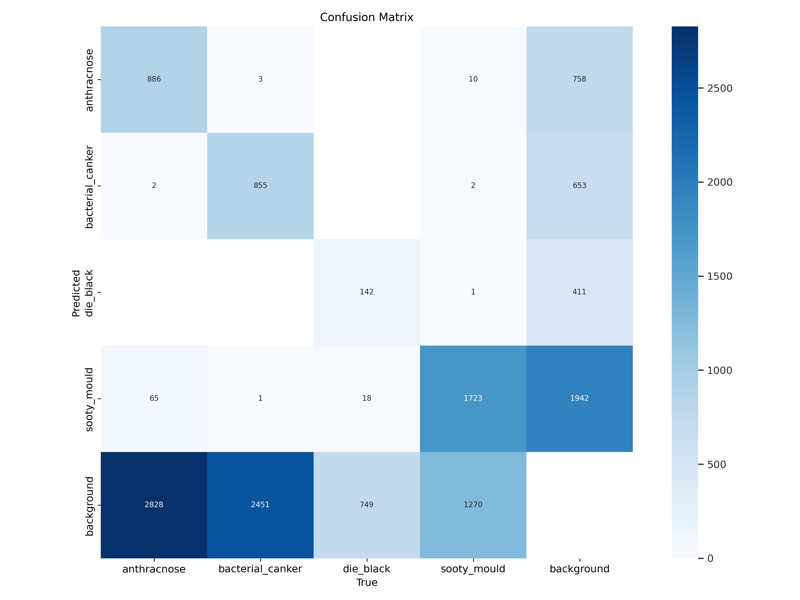

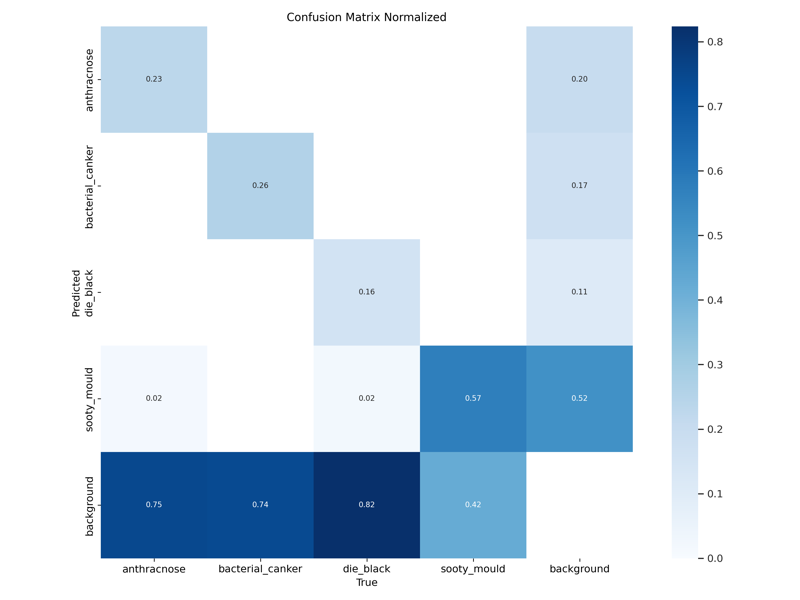

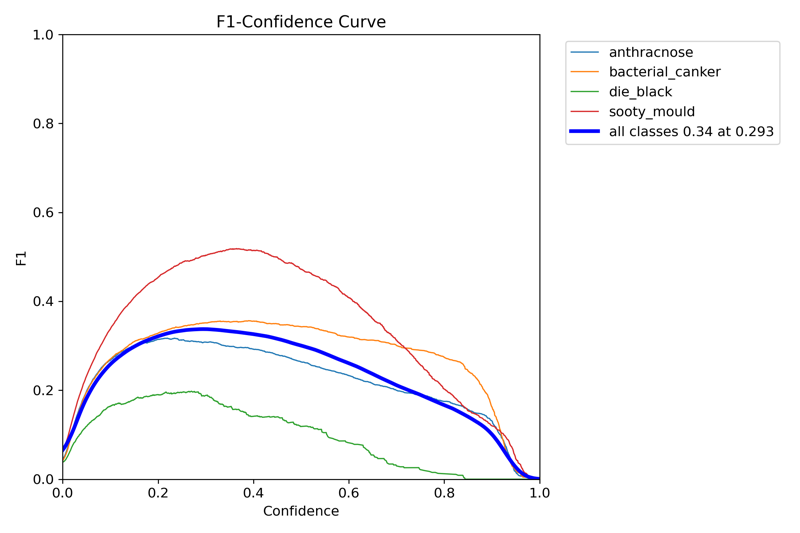

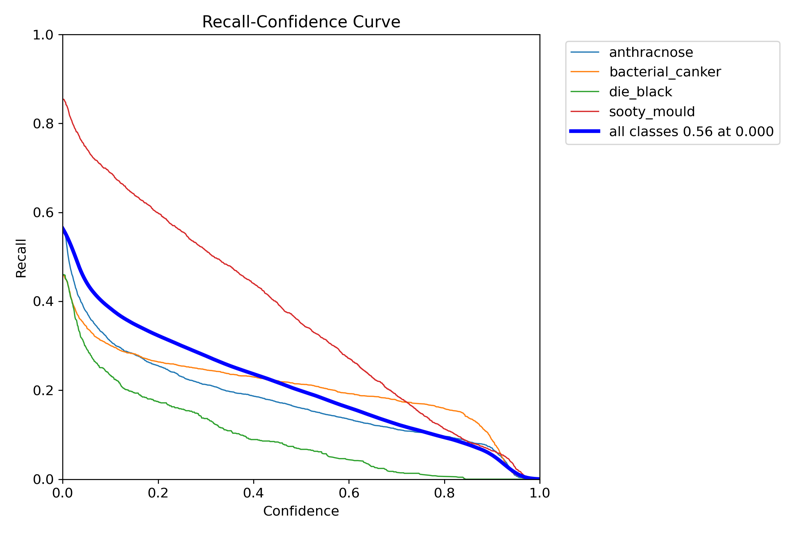

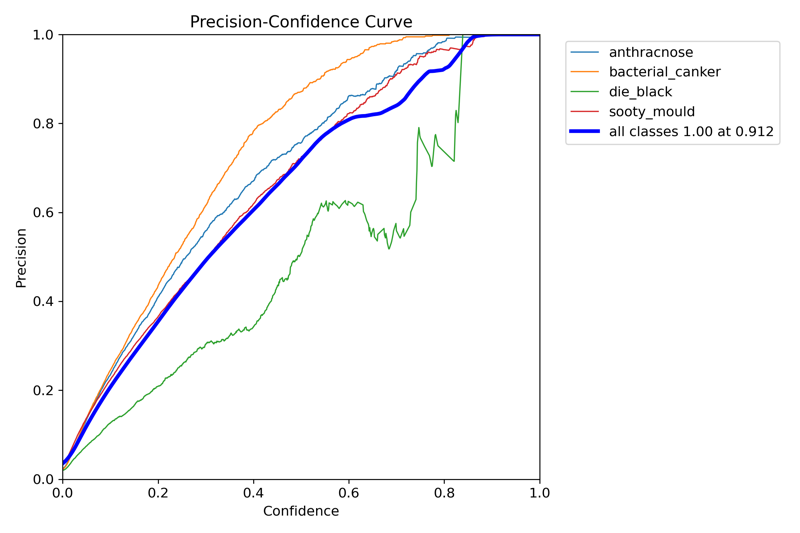

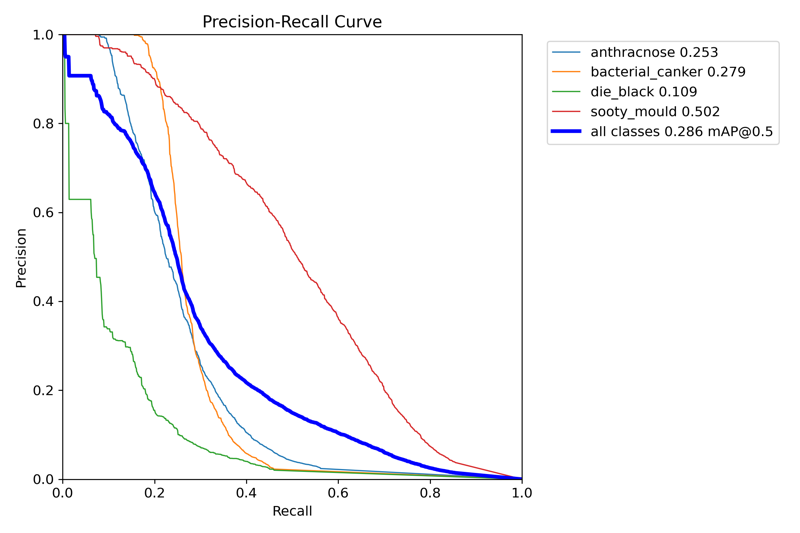

In [5]:
import os
from PIL import Image
from IPython.display import display
from IPython.display import Image as IPImage

# Define folder location
folder_path = "/home/user35/yolo/yolo5/new/runs/detect/train64/"

# Function to display images resized to fit the screen width
def display_images_resized(file_names, folder_path, screen_width=800):
    for img_file in file_names:
        img_path = os.path.join(folder_path, img_file)
        if not os.path.exists(img_path):
            print(f"File {img_file} does not exist in the folder {folder_path}.")
            continue
        try:
            with Image.open(img_path) as img:
                # Calculate new dimensions maintaining the aspect ratio
                aspect_ratio = img.height / img.width
                new_width = screen_width
                new_height = int(new_width * aspect_ratio)
                
                # Resize the image
                resized_img = img.resize((new_width, new_height))
                
                # Display the image in the notebook
                display(resized_img)
                
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

# Fixed user input for 3 image files
input_file_names = ["confusion_matrix.png", "confusion_matrix_normalized.png", "F1_curve.png","R_curve.png","P_curve.png","PR_curve.png"]

# Call the function to display the images
display_images_resized(input_file_names, folder_path)


________________________________________________________________


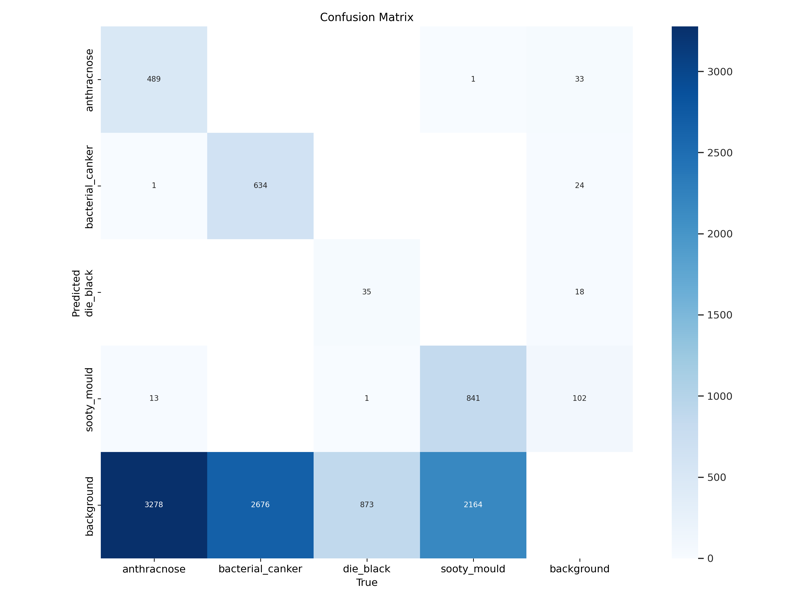

________________________________________________________________
________________________________________________________________


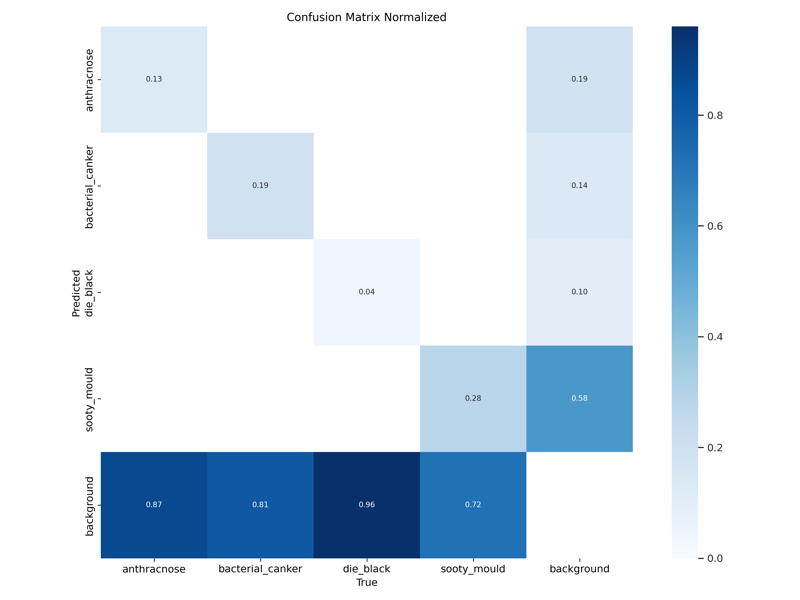

________________________________________________________________
________________________________________________________________


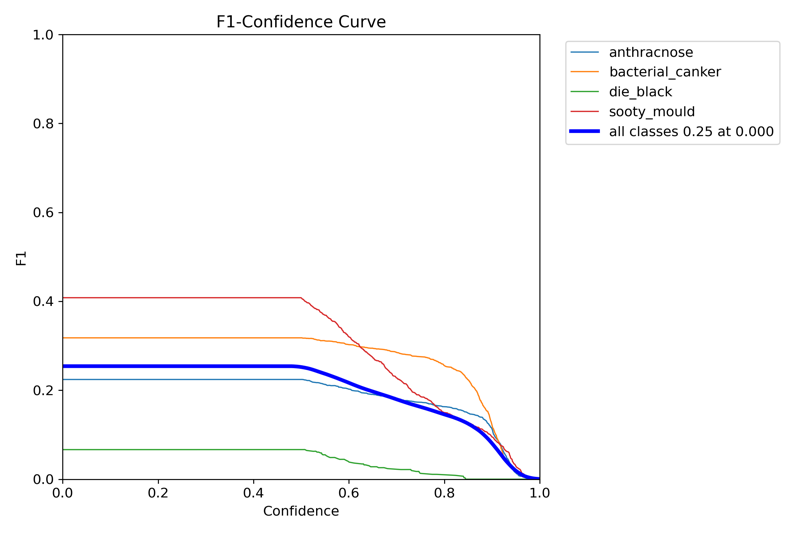

________________________________________________________________
________________________________________________________________


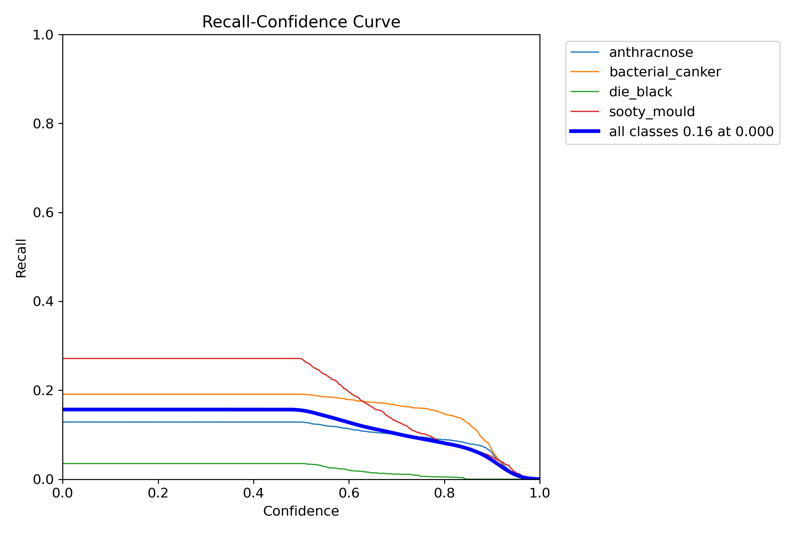

________________________________________________________________
________________________________________________________________


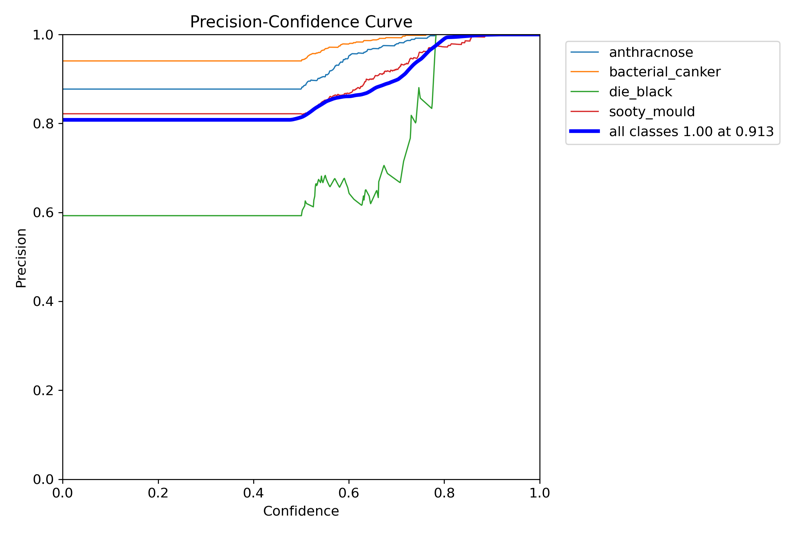

________________________________________________________________
________________________________________________________________


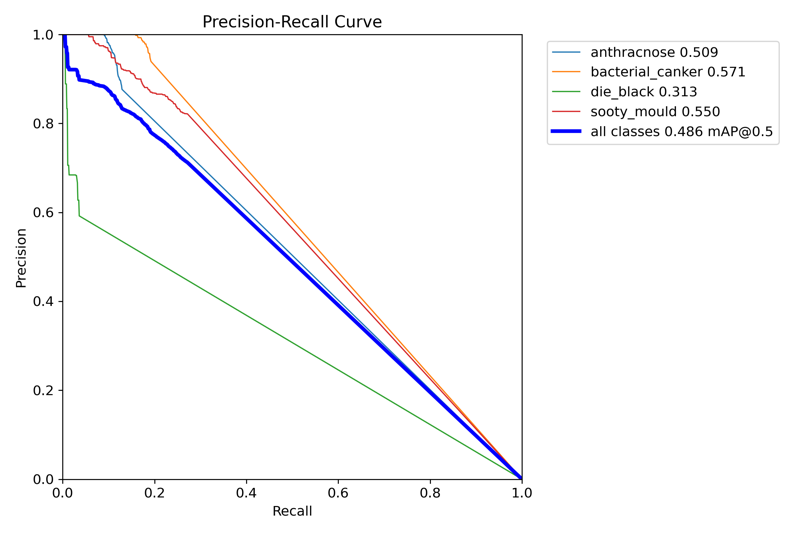

________________________________________________________________


In [6]:
import os
from PIL import Image
from IPython.display import display
from IPython.display import Image as IPImage

# Define folder location
folder_path = "/home/user35/yolo/yolo5/new/runs/detect/val35/"

# Function to display images resized to fit the screen width
def display_images_resized(file_names, folder_path, screen_width=800):
    for img_file in file_names:
        img_path = os.path.join(folder_path, img_file)
        if not os.path.exists(img_path):
            print(f"File {img_file} does not exist in the folder {folder_path}.")
            continue
        try:
            with Image.open(img_path) as img:
                # Calculate new dimensions maintaining the aspect ratio
                aspect_ratio = img.height / img.width
                new_width = screen_width
                new_height = int(new_width * aspect_ratio)
                
                # Resize the image
                resized_img = img.resize((new_width, new_height))
                
                # Display the image in the notebook
                print("________________________________________________________________")
                display(resized_img)
                print("________________________________________________________________")
                
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

# Fixed user input for 3 image files
input_file_names = ["confusion_matrix.png", "confusion_matrix_normalized.png", "F1_curve.png","R_curve.png","P_curve.png","PR_curve.png"]

# Call the function to display the images
display_images_resized(input_file_names, folder_path)
